<a href="https://colab.research.google.com/github/UncleSamTech/scratch_test_suite/blob/main/metrics_all_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import re
import os
from scipy.stats import spearmanr, pearsonr
from pathlib import Path

In [2]:
scaler = MinMaxScaler()

In [ ]:
load_nltk_metrics_files = pd.read_csv("/content/new_metrics/nltk_investigate_10_5_3_logs.txt",on_bad_lines='skip')

In [ ]:
load_bilstm_metrics_files = pd.read_csv("/content/new_metrics/bilstm/bilstm_investigate_10_6_1_logs.csv",on_bad_lines='skip')

In [ ]:
load_bilstm_metrics_files.head()

,query,expected,answer,rank,correct
0,eventunderscorewhenbroadcastreceived,broadcastunderscoreoptionunderscorefan,leftangliteralrightang,-1,0
1,eventunderscorewhenbroadcastreceived broadcast...,leftangliteralrightang,leftangliteralrightang,1,1
2,eventunderscorewhenbroadcastreceived broadcast...,controlunderscorewait,leftangliteralrightang,-1,0
3,eventunderscorewhenflagclicked,controlunderscoreforever,leftangliteralrightang,-1,0
4,eventunderscorewhenflagclicked controlundersco...,bodyblock,leftangliteralrightang,-1,0


In [ ]:
load_nltk_metrics_files.head()

,query,expected,answer,rank,correct
0,eventunderscorewhenflagclicked,looksunderscoreswitchbackdropto,<s>,4.0,0.0
1,eventunderscorewhenflagclicked,looksunderscoreswitchbackdropto,<s>,4.0,0.0
2,eventunderscorewhenflagclicked looksunderscore...,backdrop,<s>,5.0,0.0
3,eventunderscorewhenflagclicked looksunderscore...,leftangliteralrightang,<s>,6.0,0.0
4,eventunderscorewhenflagclicked looksunderscore...,leftangliteralrightang,<s>,6.0,0.0


In [ ]:
load_kenlm_metrics_files = pd.read_csv("/content/new_metrics/kenlm/kenlm_investigate_10_6_1_logs.csv",on_bad_lines='skip')


In [ ]:
load_kenlm_metrics_files.head()

,query,expected,answer,rank,correct
0,eventunderscorewhenflagclicked,looksunderscoreswitchbackdropto,dataunderscoresetvariableto,-1,0
1,eventunderscorewhenflagclicked,looksunderscoreswitchbackdropto,dataunderscoresetvariableto,-1,0
2,eventunderscorewhenflagclicked looksunderscore...,backdrop,</s>,7,0
3,eventunderscorewhenflagclicked looksunderscore...,leftangliteralrightang,looksunderscorebackdrops,-1,0
4,eventunderscorewhenflagclicked looksunderscore...,leftangliteralrightang,leftangliteralrightang leftangliteralrightang ...,-1,0


load the correct column and rank column

In [ ]:
correct_val = load_bilstm_metrics_files['correct'].to_list()
rank_val = load_bilstm_metrics_files['rank'].to_list()

In [3]:
def compute_tp_fp_fn(metrics_file):
  TP = metrics_file[metrics_file['correct'] == 1]['correct'].to_list()
  FP = metrics_file[(metrics_file['correct'] == 0) & (metrics_file['rank'] != -1)]['correct'].to_list()
  FN = metrics_file[metrics_file['rank'] == -1]['rank'].to_list()
  return TP,FP,FN

In [4]:
def compute_tp_fp_all(metrics_file):
  TP = metrics_file[metrics_file['correct'] == 1]['correct'].to_list()


  FP = metrics_file[(metrics_file['correct'] == 0) & (metrics_file['rank'] != -1)]['correct'].to_list()

  ALL = metrics_file['query'].to_list()

  return TP,FP,ALL

In [5]:
def compute_tp_fp_all_new(metrics_file):
    """
    Compute True Positives (TP), False Positives (FP), and total queries (ALL).

    Args:
        metrics_file (pd.DataFrame): DataFrame containing metrics.

    Returns:
        tuple: (TP, FP, ALL)
    """
    TP = len(metrics_file[metrics_file['correct'] == 1])  # Count of True Positives
    FP = len(metrics_file[(metrics_file['correct'] == 0) & (metrics_file['rank'] != -1)])  # Count of False Positives
    ALL = len(metrics_file['query'])  # Total number of queries
    return TP, FP, ALL

In [6]:
def compute_accuracy_precision_new(TP, FP, ALL):
    """
    Compute accuracy and precision.

    Args:
        TP (int): True Positives.
        FP (int): False Positives.
        ALL (int): Total number of queries.

    Returns:
        tuple: (accuracy, precision)
    """
    accuracy = (TP + FP) / ALL if ALL != 0 else 0  # Accuracy formula
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision formula
    return accuracy, precision

In [7]:
def extract_run_upd(file_path):
    """
    Extract the run value from the filename.

    Args:
        file_path (Path): Path to the file.

    Returns:
        int: The extracted run value.
    """
    file_name = str(file_path).split('/')[-1]  # Get the file name from the path
    parts = file_name.split('_')  # Split the file name by underscores
    run_value = int(parts[2])  # Extract the run value (adjust index as needed)
    return run_value

In [ ]:
metrics_file = pd.read_csv("/content/logs/nltk/10/nltk_investigate_10_2_1_logs.txt",on_bad_lines='skip')

In [ ]:
compute_tp_fp_all(metrics_file)

([],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [8]:
def compute_accuracy_precision_recall_f1score(TP,FP,FN):
  accuracy = len(TP) / (len(TP) + len(FP) + len(FN))
  precision = len(TP) / (len(TP) + len(FP))
  recall = len(TP) / (len(TP) + len(FN))
  f1score = 2 * ((precision * recall) / (precision + recall))
  return accuracy,precision,recall,f1score


In [9]:
def compute_accuracy_precision(TP,FP,ALL):
  accuracy = len(TP) / len(ALL)
  precision = len(TP) / (len(TP) + len(FP))
  return accuracy,precision

In [10]:
def extract_ngram(file_path):
  file_name = file_path.split('/')[-1]
  ngram_value = int(file_name.split('_')[-1].split('.')[0])
  return ngram_value

In [11]:
def extract_ngram_upd(file_path):
    file_name = str(file_path).split('/')[-1]  # Get the file name from the path
    parts = file_name.split('_')  # Split the file name by underscores
    ngram_value = int(parts[3])  # Extract the second-to-last part
    return ngram_value

In [ ]:
extract_ngram_upd("/content/new_metrics/kenlm/10/kenlm_investigate_10_5_5_logs.csv")

5

In [12]:
def extract_project_number(file_path):
  file_name = file_path.split('/')[-1]
  proj_number = int(file_name.split('_')[-1].split('.')[0])
  return proj_number

In [13]:
def extract_project_number_upd(file_path):
  file_name = str(file_path).split('/')[-1]
  parts = file_name.split('_')
  proj_number = int(parts[-4])
  return proj_number

In [14]:
def extract_run(file_path):
  file_name = file_path.split('/')[-1]
  run_number = int(file_name.split('_')[-2])
  return run_number

In [15]:
def extract_run_upd(file_path):
    """
    Extract the 'run' value from the filename.

    Args:
        file_path (Path or str): Path to the file.

    Returns:
        str: The extracted run value.
    """
    # Convert Path object to string if necessary
    file_path = str(file_path)

    # Example logic to extract 'run' from the filename
    # Adjust this based on your actual filename structure
    parts = file_path.split('_')
    run = parts[-2]  # Adjust index based on your filename structure
    return run

In [ ]:
extract_run("/content/new_metrics/bilstm_investigate_10_6_1_logs.csv")

1

In [ ]:
extract_project_number_upd("/content/new_metrics/bilstm_investigate_10_6_1_logs.csv")

10

In [16]:
def get_rank(file_name):
  metrics_file = pd.read_csv(file_name, on_bad_lines='skip')
  rank_val = metrics_file['rank'].to_list()
  mrr = compute_mrr(rank_val)
  return mrr


In [17]:
def compute_rr(list_of_ranks):
    return [1 / int(rank) if int(rank) > 0 else 0 for rank in list_of_ranks]

In [18]:
def compute_mrr(r):
  sum_of_ranks = sum(compute_rr(r))
  print(f"sum of ranks {sum_of_ranks} total queries {len(r)}  mrr : {sum_of_ranks/ len(r)}")
  return sum_of_ranks / len(r)


In [19]:
import numpy as np
import pandas as pd

def compute_mrr_opt(r):
    if not isinstance(r, (list, tuple)):
        raise ValueError("Input should be a list or tuple of numeric values")
    cleaned_r = [x for x in r if isinstance(x, (int, float)) and np.isfinite(x) and not pd.isna(x)]
    return sum(cleaned_r) / len(cleaned_r) if cleaned_r else 0


In [20]:


def load_read_compute_write_metrics(file_path, result_path, res_filename):
    all_files = sorted([f.strip() for f in os.listdir(file_path)])
    for each_file in all_files:
      if each_file.endswith(".txt"):

        filename = os.path.join(file_path, each_file)

        # Read the CSV file
        metrics_file = pd.read_csv(filename, on_bad_lines='skip')

        # Extract the n-gram value
        ngram = extract_ngram_upd(filename)

        # Compute TP, FP, FN
        TP, FP, ALL = compute_tp_fp_all(metrics_file)

        # Compute metrics
        accuracy, precision = compute_accuracy_precision(TP, FP, ALL)
        mrr = get_rank(filename)

        # Construct the final file path
        final_path = f"{result_path}/{res_filename}"

        run = extract_run(filename)

        # Check if the file exists; if not, write the headers
        if not os.path.exists(final_path):  # Correct existence check
            with open(final_path, 'w') as file:  # Use 'w' mode to create and write headers
                file.write("accuracy,precision,recall,f1score,ngram,run\n")

        # Append the values
        with open(final_path, 'a') as file:  # Use 'a' mode to append
            file.write(f"{accuracy},{precision},{ngram},{run}\n")


In [21]:
def load_read_compute_write_metrics_upd(file_path, result_path, res_filename):
    """
    Process metrics files, compute metrics, and write results to a final file.

    Args:
        file_path (str): Directory containing input files.
        result_path (str): Directory to save the results.
        res_filename (str): Name of the output file.
    """
    # Use pathlib for better path handling
    file_path = Path(file_path)
    result_path = Path(result_path)
    final_path = result_path / res_filename

    # Create the result directory if it doesn't exist
    result_path.mkdir(parents=True, exist_ok=True)

    # Write headers if the file doesn't exist
    if not final_path.exists():
        with open(final_path, 'w') as file:
            file.write("accuracy,precision,mrr,ngram,run\n")

    # Process each file in the directory
    for each_file in sorted(file_path.glob("*.txt")):
        try:
            # Read the CSV file
            metrics_file = pd.read_csv(each_file, on_bad_lines='skip')

            # Extract the n-gram value
            ngram = extract_ngram_upd(each_file)

            # Compute TP, FP, FN
            TP, FP, ALL = compute_tp_fp_all(metrics_file)


            # Compute metrics
            accuracy, precision = compute_accuracy_precision(TP, FP, ALL)

            mrr = get_rank(each_file)

            # Construct the final file path
            # Extract the run value
            run = extract_run_upd(each_file)

            # Append the results to the final file
            with open(final_path, 'a') as file:
                file.write(f"{accuracy},{precision},{mrr},{ngram},{run}\n")
        except Exception as e:
            print(f"Error processing file {each_file}: {e}")

In [22]:


def load_read_compute_write_metrics_upd_opt(file_path, result_path, res_filename):
    """
    Process metrics files, compute metrics, and write results to a final file.

    Args:
        file_path (str): Directory containing input files.
        result_path (str): Directory to save the results.
        res_filename (str): Name of the output file.
    """
    file_path = Path(file_path)
    result_path = Path(result_path)
    final_path = result_path / res_filename

    # Ensure result directory exists
    result_path.mkdir(parents=True, exist_ok=True)

    # Write headers if the output file doesn't exist
    if not final_path.exists():
        final_path.write_text("accuracy,precision,mrr,ngram,run\n")

    # Process files in the directory
    for each_file in sorted(file_path.glob("*.txt")):
        try:
            metrics_file = pd.read_csv(each_file, on_bad_lines='skip')
            ngram = extract_ngram_upd(each_file)
            TP, FP, ALL = compute_tp_fp_all(metrics_file)
            accuracy, precision = compute_accuracy_precision(TP, FP, ALL)
            mrr = get_rank(each_file)
            run = extract_run_upd(each_file)

            # Append results efficiently
            with final_path.open('a') as file:
                file.write(f"{accuracy},{precision},{mrr},{ngram},{run}\n")

        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {each_file}")
        except FileNotFoundError:
            print(f"File not found: {each_file}")
        except Exception as e:
            print(f"Error processing file {each_file}: {e}")


In [23]:


def load_read_compute_write_metrics_nongram(file_path, result_path, res_filename):
    all_files = sorted([f.strip() for f in os.listdir(file_path)])
    for each_file in all_files:
      if each_file.endswith(".csv"):

        filename = os.path.join(file_path, each_file)

        # Read the CSV file
        metrics_file = pd.read_csv(filename, on_bad_lines='skip')


        # Compute TP, FP, FN
        TP, FP, FN = compute_tp_fp_fn(metrics_file)

        # Compute metrics
        accuracy, precision, recall, f1score = compute_accuracy_precision_recall_f1score(TP, FP, FN)

        # Construct the final file path
        final_path = f"{result_path}/{res_filename}"

        run = extract_run(filename)

        # Check if the file exists; if not, write the headers
        if not os.path.exists(final_path):  # Correct existence check
            with open(final_path, 'w') as file:  # Use 'w' mode to create and write headers
                file.write("accuracy,precision,recall,f1score,run\n")

        # Append the values
        with open(final_path, 'a') as file:  # Use 'a' mode to append
            file.write(f"{accuracy},{precision},{recall},{f1score},{run}\n")


In [ ]:
load_read_compute_write_metrics_nongram("/content/new_metrics/bilstm","/content/metrics_results/bilstm/10","bilstm_10_metrics.csv")

In [ ]:
load_read_compute_write_metrics_upd_opt("/content/logs/kenlm/50","/content/result/kenlm/50","kenlm_50_metrics.csv")

In [ ]:
compute_rr([1,2,3,4,5])

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2]

In [ ]:
compute_mrr([0,0,1/3,1,1])

0.4666666666666666

In [ ]:
def write_mrr_ngram_to_file(file_path,result_path,metric_file):
  all_files = sorted([f.strip() for f in os.listdir(file_path)])
  for each_file in all_files:
    if each_file.endswith(".csv"):
      filename = os.path.join(file_path, each_file)
      ngram = extract_ngram_upd(filename.strip())
      mrr = get_rank(filename)
      final_path = f"{result_path}/{metric_file}"
      run = extract_run(filename)
      if not os.path.exists(final_path):
        with open(final_path, 'w') as file:
          file.write("mrr,ngram,run\n")
      with open(final_path, 'a') as file:
        file.write(f"{mrr},{ngram},{run}\n")

In [ ]:
def write_mrr_to_file(filename,result_path,metric_file):
  proj_number = extract_project_number_upd(filename)
  mrr = get_rank(filename)
  final_path = f"{result_path}/{metric_file}"
  if not os.path.exists(final_path):
    with open(final_path, 'w') as file:
      file.write("mrr,proj_number\n")
  with open(final_path, 'a') as file:
    file.write(f"{mrr},{proj_number}\n")

In [ ]:
write_mrr_ngram_to_file("/content/new_metrics/kenlm/10","/content/metrics_results/kenlm/10","kenlm_10_metrics_mrr.csv")

In [ ]:
extract_ngram_upd("/content/new_metrics/kenlm/10/kenlm_investigate_10_5__logs.csv")

['kenlm', 'investigate', '10', '5', '4', 'logs.csv']


5

In [ ]:
write_mrr_ngram_to_file("/content/new_metrics/nltk/500/nltk_investigate_500_6.csv","/content/metrics_results/nltk/500","nltk_500_metrics_mrr.csv")

mrr for /content/new_metrics/nltk/500/nltk_investigate_500_6.csv is 0.3922621898584491


In [ ]:
write_mrr_to_file("/content/new_metrics/bilstm/50/bilstm_investigate_50.csv","/content/metrics_results/bilstm/50","bilstm_50_metrics_mrr.csv")

In [ ]:
get_rank("/content/new_metrics/bilstm_investigate_10_6_1_logs.csv")

0.5047183021387709

In [ ]:
get_rank("/content/new_metrics/kenlm_investigate_10_2_1_logs.csv")

0.5021998422078779

In [ ]:
load_read_compute_write_metrics("/content/new_metrics/kenlm/10","/content/metrics_results/kenlm/10","kenlm_10_metrics.csv")

In [ ]:
load_read_compute_write_metrics("/content/new_metrics/nltk/500/nltk_investigate_500_6.csv","/content/metrics_results/nltk/500","nltk_500_metrics.csv")

Load nltk_metrics_files


In [ ]:
df_main_nltk_10 = pd.read_csv("/content/metrics/nltk/nltk_10_metrics.csv")
df_main_nltk_50 = pd.read_csv("/content/metrics/nltk/nltk_50_metrics.csv")
df_main_nltk_100 = pd.read_csv("/content/metrics/nltk/nltk_100_metrics.csv")
df_main_nltk_150 = pd.read_csv("/content/metrics/nltk/nltk_150_metrics.csv")
df_main_nltk_500 = pd.read_csv("/content/metrics/nltk/nltk_500_metrics.csv")

In [ ]:
df_all_groups_accuracy_10_nltk = df_main_nltk_10['accuracy'].tolist()
df_all_groups_accuracy_50_nltk = df_main_nltk_50['accuracy'].tolist()
df_all_groups_accuracy_100_nltk = df_main_nltk_100['accuracy'].tolist()
df_all_groups_accuracy_150_nltk = df_main_nltk_150['accuracy'].tolist()
df_all_groups_accuracy_500_nltk = df_main_nltk_500['accuracy'].tolist()

In [ ]:
df_all_groups_precision_10_nltk = df_main_nltk_10['precision'].tolist()
df_all_groups_precision_50_nltk = df_main_nltk_50['precision'].tolist()
df_all_groups_precision_100_nltk = df_main_nltk_100['precision'].tolist()
df_all_groups_precision_150_nltk = df_main_nltk_150['precision'].tolist()
df_all_groups_precision_500_nltk = df_main_nltk_500['precision'].tolist()

In [ ]:
df_main_kenlm_10 = pd.read_csv("/content/metrics_results/kenlm/10/kenlm_10_metrics.csv")
# df_main_kenlm_50 = pd.read_csv("/content/metrics/kenlm/kenlm_50_metrics.csv")
# df_main_kenlm_100 = pd.read_csv("/content/metrics/kenlm/kenlm_100_metrics.csv")
# df_main_kenlm_150 = pd.read_csv("/content/metrics/kenlm/kenlm_150_metrics.csv")
# df_main_kenlm_500 = pd.read_csv("/content/metrics/kenlm/kenlm_500_metrics.csv")

In [ ]:
df_all_groups_accuracy_10_kenlm = df_main_kenlm_10['accuracy'].tolist()
# df_all_groups_accuracy_50_kenlm = df_main_kenlm_50['accuracy'].tolist()
# df_all_groups_accuracy_100_kenlm = df_main_kenlm_100['accuracy'].tolist()
# df_all_groups_accuracy_150_kenlm = df_main_kenlm_150['accuracy'].tolist()
# df_all_groups_accuracy_500_kenlm = df_main_kenlm_500['accuracy'].tolist()

In [ ]:
print(len(df_all_groups_accuracy_10_kenlm))

20


In [ ]:
df_all_groups_precision_10_kenlm = df_main_kenlm_10['precision'].tolist()
# df_all_groups_precision_50_kenlm = df_main_kenlm_50['precision'].tolist()
# df_all_groups_precision_100_kenlm = df_main_kenlm_100['precision'].tolist()
# df_all_groups_precision_150_kenlm = df_main_kenlm_150['precision'].tolist()
# df_all_groups_precision_500_kenlm = df_main_kenlm_500['precision'].tolist()

In [ ]:
#plot metrics

def plot_line_chart(x_axis_data1,y_axis_data1,y_axis_data2,title,ylabel,xlabel,figpath,filename):
  plt.plot(x_axis_data1, y_axis_data1, label = "Accuracy")
  plt.plot(x_axis_data1, y_axis_data2, label = "Precision")
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xticks(ticks=range(int(min(x_axis_data1)), int(max(x_axis_data1)) + 1))
  plt.legend()
  plt.savefig(f"{figpath}/{filename}")
  plt.show()

In [ ]:


def plot_line_chart_upd(x_axis_data1, y_axis_data1, y_axis_data2, title, ylabel, xlabel, figpath, filename):
    # Ensure x_axis_data1 has the same length as the number of ngrams
    num_ngrams = len(x_axis_data1)

    # Plot each of the 5 points for every ngram
    for i in range(num_ngrams):
        x_values = [x_axis_data1[i]] * 5  # Repeat the ngram value 5 times for the x-axis
        plt.plot(x_values, y_axis_data1[i], marker='o', linestyle='-', label=f"Accuracy (Ngram {x_axis_data1[i]})" if i == 0 else "")
        plt.plot(x_values, y_axis_data2[i], marker='s', linestyle='--', label=f"Precision (Ngram {x_axis_data1[i]})" if i == 0 else "")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(ticks=range(int(min(x_axis_data1)), int(max(x_axis_data1)) + 1))
    plt.legend()
    plt.savefig(f"{figpath}/{filename}")
    plt.show()

In [ ]:


def plot_line_chart_upd2(x_axis_data1, y_axis_data1, y_axis_data2, title, ylabel, xlabel, figpath, filename):
    # Ensure x_axis_data1 has the same length as the number of ngrams
    num_ngrams = len(x_axis_data1)

    # Define two colors for accuracy and precision
    accuracy_color = 'blue'
    precision_color = 'orange'

    # Plot each of the 5 points for every ngram
    for i in range(num_ngrams):
        x_values = [x_axis_data1[i]] * 5  # Repeat the ngram value 5 times for the x-axis

        # Plot accuracy points
        plt.plot(x_values, y_axis_data1[i], marker='o', linestyle='-', color=accuracy_color, label="Accuracy" if i == 0 else "")

        # Plot precision points
        plt.plot(x_values, y_axis_data2[i], marker='s', linestyle=':', color=precision_color, label="Precision" if i == 0 else "")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(ticks=range(int(min(x_axis_data1)), int(max(x_axis_data1)) + 1))
    plt.legend()
    plt.savefig(f"{figpath}/{filename}")
    plt.show()

In [ ]:
ngram = list(range(2,6))

In [ ]:
def get_all_metric_by_ngram(data,ngram,metric):
  df_filtered = data[data['ngram'] == ngram]
  return df_filtered[metric].tolist()


In [ ]:
get_all_metric_by_ngram(df_main_kenlm_10,2,'accuracy')

[0.4124520784156161,
 0.504948632377961,
 0.495359184497657,
 0.4932565878878292,
 0.4908264113053797]

In [ ]:
def form_all_metric(data,ngram,metric):
  spec_metric = []
  for each_ngram in ngram:
    spec_metric.append(get_all_metric_by_ngram(data,each_ngram,metric))
  return spec_metric

In [ ]:
acc = form_all_metric(df_main_kenlm_10,ngram,'accuracy')
print(acc)

[[0.4124520784156161, 0.504948632377961, 0.495359184497657, 0.4932565878878292, 0.4908264113053797], [0.4840827749522349, 0.485612941387852, 0.4836127196635039, 0.4807967983729436, 0.4899226419675998], [0.4514925850247933, 0.4665032399807708, 0.4632825764234137, 0.4679231501608348, 0.4570810150373193], [0.4238696711682411, 0.4322314144540091, 0.4367393627880724, 0.4389238134909657, 0.4380044060228759]]


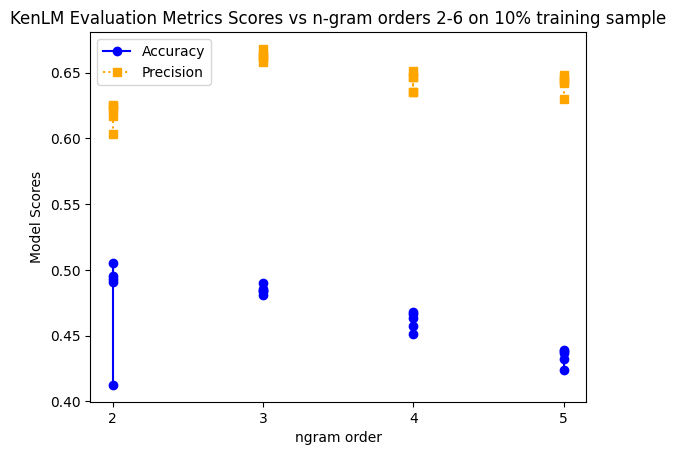

In [ ]:
plot_line_chart_upd2(ngram,form_all_metric(df_main_kenlm_10,ngram,'accuracy'),form_all_metric(df_main_kenlm_10,ngram,'precision'),"KenLM Evaluation Metrics Scores vs n-gram orders 2-6 on 10% training sample","Model Scores","ngram order","/content/result_path/kenlm","kenlm_correct_plot_10_projects_upd.pdf")

In [ ]:
def kruskal_test(grp1,grp2,grp3,grp4,grp5,metrics):
  result_metric = kruskal(grp1,grp2,grp3,grp4,grp5)
  print(f"kruskal {metrics} ", result_metric)

In [ ]:
kruskal_test(df_all_groups_accuracy_10_kenlm,df_all_groups_accuracy_50_kenlm,df_all_groups_accuracy_100_kenlm,df_all_groups_accuracy_150_kenlm,df_all_groups_accuracy_500_kenlm,"accuracy")

kruskal accuracy  KruskalResult(statistic=14.754461538461541, pvalue=0.005238535175017048)


In [ ]:
kruskal_test(0.0011,0.124,1000,10000,1000001,"projects")

kruskal projects  KruskalResult(statistic=4.0, pvalue=0.40600584970983794)


In [ ]:
# Function to calculate quartiles, IQR, median, min, max
def calc_stats(data,metrics,sample_size):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    median = np.median(data)
    min_val = np.min(data)
    max_val = np.max(data)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    print(f"First Quartile for {sample_size} projects metrics {metrics} => {Q1}")
    print(f"Third Quartile for {sample_size} projects metrics {metrics} => {Q3}")
    print(f"Inter Quartile Range for {sample_size} projects metrics {metrics} => {IQR}")
    print(f"Median for {sample_size} projects metrics {metrics} => {median}")
    print(f"Minimum value for {sample_size} projects metrics {metrics} => {min_val}")
    print(f"Maximum value for {sample_size} projects metrics {metrics} => {max_val}")
    print(f"Outliers values for {sample_size} projects metrics {metrics} => {outliers}")
    #return Q1, Q3, IQR, median, min_val, max_val


In [ ]:
calc_stats(df_all_groups_precision_500_kenlm,"precision",500)

First Quartile for 500 projects metrics precision => 0.7120756141936813
Third Quartile for 500 projects metrics precision => 0.780901135515003
Inter Quartile Range for 500 projects metrics precision => 0.06882552132132169
Median for 500 projects metrics precision => 0.7701063735089906
Minimum value for 500 projects metrics precision => 0.7087032844022693
Maximum value for 500 projects metrics precision => 0.8549571671425873
Outliers values for 500 projects metrics precision => []


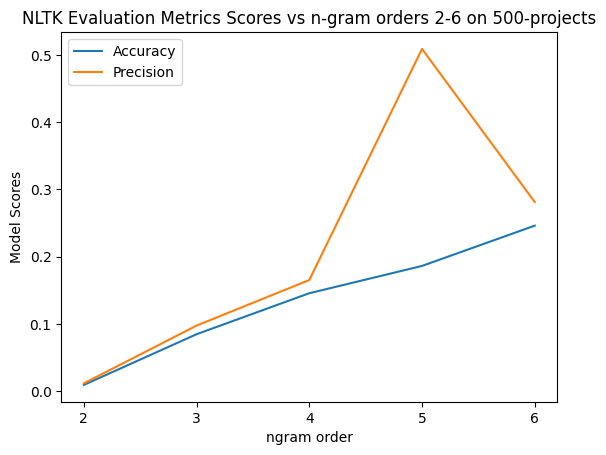

In [ ]:
ngram = list(range(2,7))
plot_line_chart(ngram,df_all_groups_accuracy_500_nltk,df_all_groups_precision_500_nltk,"NLTK Evaluation Metrics Scores vs n-gram orders 2-6 on 500-projects","Model Scores","ngram order","/content/result_path/nltk","nltk_correct_plot_500_projects_upd.pdf")

In [ ]:
df_accuracy_nltk_all = pd.DataFrame({'10-projects-accuracy-nltk':df_all_groups_accuracy_10_nltk,'50-projects-accuracy-nltk':df_all_groups_accuracy_50_nltk,'100-projects-accuracy-nltk':df_all_groups_accuracy_100_nltk,'150-projects-accuracy-nltk':df_all_groups_accuracy_150_nltk,'500-projects-accuracy-nltk':df_all_groups_accuracy_500_nltk})
df_precision_nltk_all = pd.DataFrame({'10-projects-precision-nltk':df_all_groups_precision_10_nltk,'50-projects-precision-nltk':df_all_groups_precision_50_nltk,'100-projects-precision-nltk':df_all_groups_precision_100_nltk,'150-projects-precision-nltk':df_all_groups_precision_150_nltk,'500-projects-precision-nltk':df_all_groups_precision_500_nltk})

In [ ]:
df_accuracy_kenlm_all = pd.DataFrame({'10-projects-accuracy-kenlm':df_all_groups_accuracy_10_kenlm,'50-projects-accuracy-kenlm':df_all_groups_accuracy_50_kenlm,'100-projects-accuracy-kenlm':df_all_groups_accuracy_100_kenlm,'150-projects-accuracy-kenlm':df_all_groups_accuracy_150_kenlm,'500-projects-accuracy-kenlm':df_all_groups_accuracy_500_kenlm})
df_precision_kenlm_all = pd.DataFrame({'10-projects-precision-kenlm':df_all_groups_precision_10_kenlm,'50-projects-precision-kenlm':df_all_groups_precision_50_kenlm,'100-projects-precision-kenlm':df_all_groups_precision_100_kenlm,'150-projects-precision-kenlm':df_all_groups_precision_150_kenlm,'500-projects-precision-kenlm':df_all_groups_precision_500_kenlm})

In [ ]:
def plot_boxplot(data_values,title,ylabel,xlabel,figpath):
  # Create the boxplot
  box = plt.boxplot(data_values, patch_artist=True)

  for element in box['boxes']:
      element.set(facecolor='lightgreen')


  project_samples = [10, 50, 100, 150, 500]
  plt.xticks(ticks=range(1, len(project_samples) + 1), labels=project_samples)
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.savefig(figpath)
  plt.show()

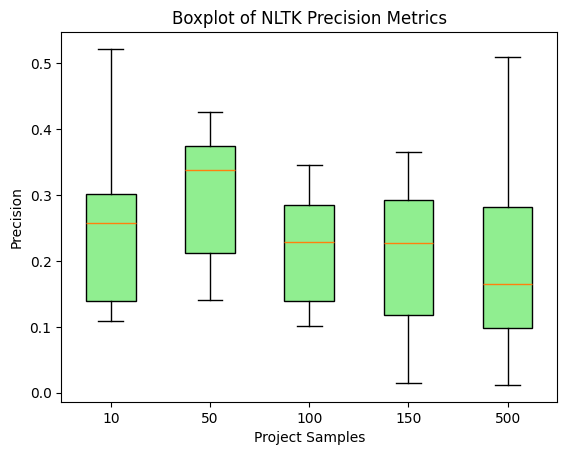

In [ ]:
plot_boxplot(df_precision_nltk_all,"Boxplot of NLTK Precision Metrics","Precision","Project Samples","/content/result_path/nltk/nltk_precision_boxplot_correct_main.pdf")

In [ ]:

def compute_scatter_plot(x_axis_data,y_axis_data,title,ylabel,xlabel,figpath,filename):
  # Calculate Pearson and Spearman correlation coefficients
  pearson_corr, _ = pearsonr(x_axis_data, y_axis_data)
  spearman_corr, _ = spearmanr(x_axis_data, y_axis_data)
  # Plotting
  plt.figure(figsize=(8, 6))
  plt.scatter(x_axis_data,y_axis_data,color='blue', marker='*', s=100)  # s=100 for marker size

  # Labels and title
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  # Annotate the plot with the correlation coefficients
  plt.text(0.05, 0.95, f'Pearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}',
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

  # Save as PDF
  plt.savefig(f"{figpath}/{filename}")
  plt.show()
  # Print the coefficients to the console
  print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")
  print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")

In [ ]:
def compute_mean_with_math(numbers):
    # Use math.fsum for better precision with floating-point numbers
    total_sum = math.fsum(numbers)
    count = len(numbers)
    mean = total_sum / count
    return mean

In [ ]:
all_instances = [32054,212971,561321,719366,885995]

In [ ]:
instances_all = [32054] * 5 + [212971] * 5 + [561321] * 5 + [719366] * 5 + [885995] * 5
#print(instances_all)

In [ ]:
all_acc2_nltk = [df_all_groups_accuracy_10_nltk,df_all_groups_accuracy_50_nltk,df_all_groups_accuracy_100_nltk,df_all_groups_accuracy_150_nltk,df_all_groups_accuracy_500_nltk]
all_prec2_nltk = [df_all_groups_precision_10_nltk,df_all_groups_precision_50_nltk,df_all_groups_precision_100_nltk,df_all_groups_precision_150_nltk,df_all_groups_precision_500_nltk]

In [ ]:
all_acc_unpacked = [val for item in all_acc2_nltk for val in item]

In [ ]:
#print(all_acc_unpacked)

In [ ]:
all_acc_nltk = [compute_mean_with_math(df_all_groups_accuracy_10_nltk),compute_mean_with_math(df_all_groups_accuracy_50_nltk),compute_mean_with_math(df_all_groups_accuracy_100_nltk),compute_mean_with_math(df_all_groups_accuracy_150_nltk),compute_mean_with_math(df_all_groups_accuracy_500_nltk)]

In [ ]:
all_prec_nltk = [compute_mean_with_math(df_all_groups_precision_10_nltk),compute_mean_with_math(df_all_groups_precision_50_nltk),compute_mean_with_math(df_all_groups_precision_100_nltk),compute_mean_with_math(df_all_groups_precision_150_nltk),compute_mean_with_math(df_all_groups_precision_500_nltk)]

In [ ]:
print(len(all_acc_nltk))

5


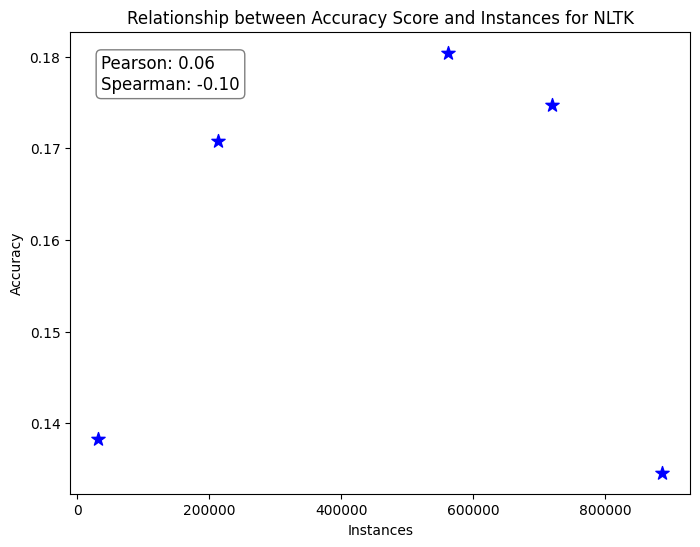

Pearson Correlation Coefficient: 0.06
Spearman Correlation Coefficient: -0.10


In [ ]:
compute_scatter_plot(all_instances,all_acc_nltk,"Relationship between Accuracy Score and Instances for NLTK","Accuracy","Instances","/content/result_path/nltk","scatt_nltk_accuracy_instances_main.pdf")

Load the BiLSTM metrics csv file


In [ ]:
df_bilstm_10_projects = pd.read_csv("/content/models_metrics_data/bilstm/bilstmmetrics_150embedtime1_10_projects.csv")
df_bilstm_50_projects = pd.read_csv("/content/models_metrics_data/bilstm/bilstmmetrics_150embedtime1_50_projects.csv")
df_bilstm_100_projects = pd.read_csv("/content/models_metrics_data/bilstm/bilstmmetrics_150embedtime1_100_projects.csv")
df_bilstm_150_projects = pd.read_csv("/content/models_metrics_data/bilstm/bilstmmetrics_150embedtime1_150_projects.csv")
df_bilstm_500_projects = pd.read_csv("/content/models_metrics_data/bilstm/bilstmmetrics_150embedtime1_500_projects.csv")


Load the BiLSTM metrics csv file


In [ ]:
df_bilstm_10_projects = pd.read_csv("/content/models_metrics_data/bilstm/bilstmmetrics_150embedtime1_10_projects.csv")
df_bilstm_50_projects = pd.read_csv("/content/models_metrics_data/bilstm/bilstmmetrics_150embedtime1_50_projects.csv")
df_bilstm_100_projects = pd.read_csv("/content/models_metrics_data/bilstm/bilstmmetrics_150embedtime1_100_projects.csv")
df_bilstm_150_projects = pd.read_csv("/content/models_metrics_data/bilstm/bilstmmetrics_150embedtime1_150_projects.csv")
df_bilstm_500_projects = pd.read_csv("/content/models_metrics_data/bilstm/bilstmmetrics_150embedtime1_500_projects.csv")


Load the nltk metrics csv files

convert BiLSTM metrics to list


In [ ]:
bilstm_all_groups_10_proj_accuracy = df_bilstm_10_projects['accuracy'].tolist()
bilstm_all_groups_50_proj_accuracy = df_bilstm_50_projects['accuracy'].tolist()
bilstm_all_groups_100_proj_accuracy = df_bilstm_100_projects['accuracy'].tolist()
bilstm_all_groups_150_proj_accuracy = df_bilstm_150_projects['accuracy'].tolist()
bilstm_all_groups_500_proj_accuracy = df_bilstm_500_projects['accuracy'].tolist()
print(type(bilstm_all_groups_10_proj_accuracy))

<class 'list'>


BiLSTM Kruskall test accuracy


In [ ]:
def kruskal_test(grp1,grp2,grp3,grp4,grp5,metrics):
  result_metric = kruskal(grp1,grp2,grp3,grp4,grp5)
  print(f"kruskal {metrics} ", result_metric)

In [ ]:
kruskal_test(df_all_groups_accuracy_10_nltk,df_all_groups_accuracy_50_nltk,df_all_groups_accuracy_100_nltk,df_all_groups_accuracy_150_nltk,df_all_groups_accuracy_500_nltk,"accuracy")

kruskal accuracy  KruskalResult(statistic=1.7132307692307762, pvalue=0.7883128578266045)


In [ ]:
kruskal_test(0.2638, 0.4053, 0.4152, 0.4124,0.4196,"mrr_nltk")

kruskal mrr_nltk  KruskalResult(statistic=4.0, pvalue=0.40600584970983794)


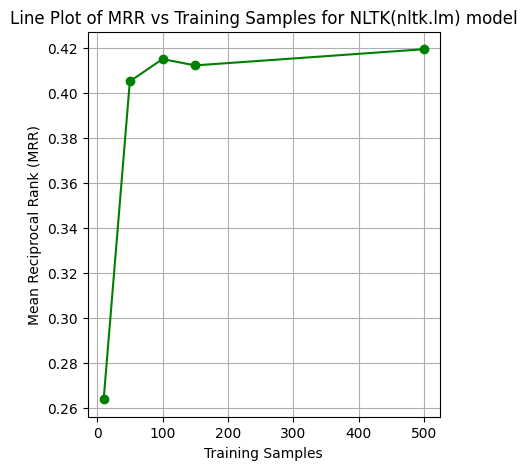

In [ ]:
# Data
training_samples = [10, 50, 100, 150, 500]
mrr = [0.2638, 0.4053, 0.4152, 0.4124, 0.4196]

# Plotting Line Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(training_samples, mrr, marker='o', linestyle='-', color='g')
plt.title('Line Plot of MRR vs Training Samples for NLTK(nltk.lm) model')
plt.xlabel('Training Samples')
plt.ylabel('Mean Reciprocal Rank (MRR)')
plt.grid(True)
plt.savefig("/content/plot_results/nltk_mrr_plot_update.pdf")

In [ ]:
bilstm_all_groups_10_proj_precision = df_bilstm_10_projects['precision'].tolist()
bilstm_all_groups_50_proj_precision = df_bilstm_50_projects['precision'].tolist()
bilstm_all_groups_100_proj_precision = df_bilstm_100_projects['precision'].tolist()
bilstm_all_groups_150_proj_precision = df_bilstm_150_projects['precision'].tolist()
bilstm_all_groups_500_proj_precision = df_bilstm_500_projects['precision'].tolist()
print(type(bilstm_all_groups_10_proj_precision))

<class 'list'>


In [ ]:
bilstm_all_groups_10_proj_recall = df_bilstm_10_projects['recall'].tolist()
bilstm_all_groups_50_proj_recall = df_bilstm_50_projects['recall'].tolist()
bilstm_all_groups_100_proj_recall = df_bilstm_100_projects['recall'].tolist()
bilstm_all_groups_150_proj_recall = df_bilstm_150_projects['recall'].tolist()
bilstm_all_groups_500_proj_recall = df_bilstm_500_projects['recall'].tolist()
print(type(bilstm_all_groups_10_proj_recall))

<class 'list'>


In [ ]:
bilstm_all_groups_10_proj_f1score = df_bilstm_10_projects['f1score'].tolist()
bilstm_all_groups_50_proj_f1score = df_bilstm_50_projects['f1score'].tolist()
bilstm_all_groups_100_proj_f1score = df_bilstm_100_projects['f1score'].tolist()
bilstm_all_groups_150_proj_f1score = df_bilstm_150_projects['f1score'].tolist()
bilstm_all_groups_500_proj_f1score = df_bilstm_500_projects['f1score'].tolist()
print(type(bilstm_all_groups_10_proj_f1score))

<class 'list'>


In [ ]:
kruskal_test(bilstm_all_groups_10_proj_f1score,bilstm_all_groups_50_proj_f1score,bilstm_all_groups_100_proj_f1score,bilstm_all_groups_150_proj_f1score,bilstm_all_groups_500_proj_f1score,"f1score")

kruskal f1score  KruskalResult(statistic=19.259076923076933, pvalue=0.0006989707314706728)


In [ ]:
df_accuracy_bilstm_all = pd.DataFrame({'10-projects-bilstm-accuracy':df_bilstm_10_projects['accuracy'],'50-projects-bilstm-accuracy':df_bilstm_50_projects['accuracy'],'100-projects-bilstm-accuracy':df_bilstm_100_projects['accuracy'],'150-projects-bilstm-accuracy':df_bilstm_150_projects['accuracy'],'500-projects-nltk-accuracy':df_bilstm_500_projects['accuracy']})
df_precision_bilstm_all = pd.DataFrame({'10-projects-nltk':df_bilstm_10_projects['precision'],'50-projects-nltk-precision':df_bilstm_50_projects['precision'],'100-projects-nltk-precision':df_bilstm_100_projects['precision'],'150-projects-nltk-precision':df_bilstm_150_projects['precision'],'500-projects-nltk-precision':df_bilstm_500_projects['precision']})
df_recall_bilstm_all = pd.DataFrame({'10-projects-nltk-recall':df_bilstm_10_projects['recall'],'50-projects-nltk-recall':df_bilstm_50_projects['recall'],'100-projects-nltk-recall':df_bilstm_100_projects['recall'],'150-projects-nltk-recall':df_bilstm_150_projects['recall'],'500-projects-nltk-recall':df_bilstm_500_projects['recall']})
df_f1score_bilstm_all = pd.DataFrame({'10-projects-nltk-f1score':df_bilstm_10_projects['f1score'],'50-projects-nltk-f1score':df_bilstm_50_projects['f1score'],'100-projects-nltk-f1score':df_bilstm_100_projects['f1score'],'150-projects-nltk-f1score':df_bilstm_150_projects['f1score'],'500-projects-nltk-f1score':df_bilstm_500_projects['f1score']})

In [ ]:
# Function to calculate quartiles, IQR, median, min, max
def calc_stats(data,metrics,sample_size):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    median = np.median(data)
    min_val = np.min(data)
    max_val = np.max(data)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    print(f"First Quartile for {sample_size} projects metrics {metrics} => {Q1}")
    print(f"Third Quartile for {sample_size} projects metrics {metrics} => {Q3}")
    print(f"Inter Quartile Range for {sample_size} projects metrics {metrics} => {IQR}")
    print(f"Median for {sample_size} projects metrics {metrics} => {median}")
    print(f"Minimum value for {sample_size} projects metrics {metrics} => {min_val}")
    print(f"Maximum value for {sample_size} projects metrics {metrics} => {max_val}")
    print(f"Outliers values for {sample_size} projects metrics {metrics} => {outliers}")
    #return Q1, Q3, IQR, median, min_val, max_val


In [ ]:
calc_stats(bilstm_all_groups_500_proj_f1score,"f1score",500)

First Quartile for 500 projects metrics f1score => 0.0981505379487849
Third Quartile for 500 projects metrics f1score => 0.1008505378065587
Inter Quartile Range for 500 projects metrics f1score => 0.002699999857773805
Median for 500 projects metrics f1score => 0.0997905259448533
Minimum value for 500 projects metrics f1score => 0.0959056415599239
Maximum value for 500 projects metrics f1score => 0.1028563745602928
Outliers values for 500 projects metrics f1score => []


In [ ]:
def plot_boxplot(data_values,title,ylabel,xlabel,figpath):
  # Create the boxplot
  box = plt.boxplot(data_values, patch_artist=True)

  # Set the color for the boxes
  for element in box['boxes']:
      element.set(facecolor='lightgreen')  # You can change 'lightgreen' to any color

  # Set x-axis labels to correspond to project sample sizes
  project_samples = [10, 50, 100, 150, 500]
  plt.xticks(ticks=range(1, len(project_samples) + 1), labels=project_samples)

  # Add titles and labels
  #plt.title("Boxplot of NLTK Accuracy Metrics")
  plt.title(title)
  plt.ylabel(ylabel)
  #plt.ylabel("Accuracy")
  plt.xlabel(xlabel)
  #plt.xlabel("Project Samples")

  # Save the plot
  plt.savefig(figpath)
  #plt.savefig("/content/plot_results/nltk_accuracy_boxplot_min.pdf")
  plt.show()

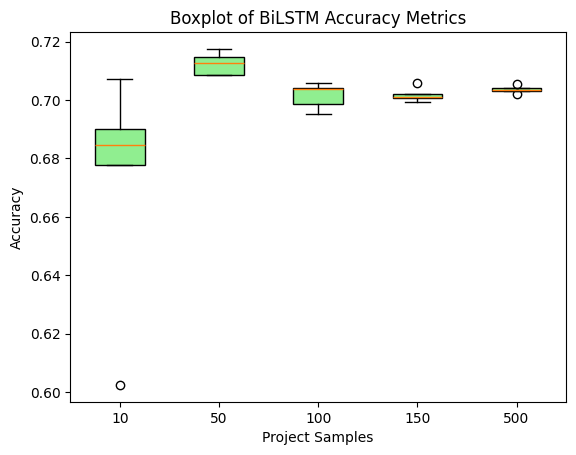

In [ ]:
plot_boxplot(df_accuracy_bilstm_all,"Boxplot of BiLSTM Accuracy Metrics","Accuracy","Project Samples","/content/plot_results/bilstm_accuracy_boxplot_min_main.pdf")

In [ ]:
all_instances = [32054,212971,561321,719366,885995]

0.04661365723875918
0.08770349660625013
0.09683197911697122
0.09216926192936511
0.0995107235640827


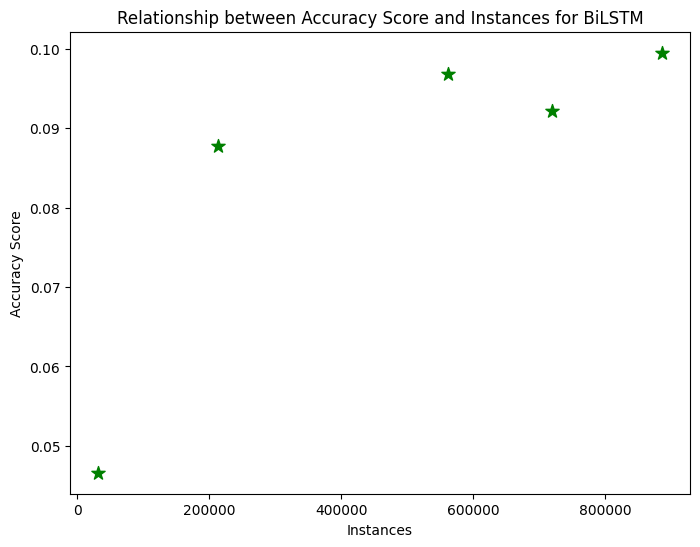

In [ ]:
# Data for recall score and instances
accuracy_data = [
    df_bilstm_10_projects['f1score'].mean(),
    df_bilstm_50_projects['f1score'].mean(),
    df_bilstm_100_projects['f1score'].mean(),
    df_bilstm_150_projects['f1score'].mean(),
    df_bilstm_500_projects['f1score'].mean()
]

print(df_bilstm_10_projects['f1score'].mean())
print(df_bilstm_50_projects['f1score'].mean())
print(df_bilstm_100_projects['f1score'].mean())
print(df_bilstm_150_projects['f1score'].mean())
print(df_bilstm_500_projects['f1score'].mean())
# Corresponding instance counts, repeated 25 times to match the length of each recall data set
instances = [32054] * 25 + [212971] * 25 + [561321] * 25 + [719366] * 25 + [885995] * 25

# Flatten recall_data list to get all data points in a single list
#recall_scores = [score for dataset in accuracy_data for score in dataset]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(all_instances,accuracy_data,color='green', marker='*', s=100)  # s=100 for marker size

# Labels and title
plt.xlabel("Instances")
plt.ylabel("Accuracy Score")
plt.title("Relationship between Accuracy Score and Instances for BiLSTM")

# Save as PDF
#plt.savefig("/content/plot_results/accuracy_score_vs_instances_plot_bilstm_main.pdf")
plt.show()

In [ ]:
df_nltk_10_projects = pd.read_csv("/content/models_metrics_data/nltk/trained_data_prec_rec_acc_10_projects.csv")
df_nltk_50_projects = pd.read_csv("/content/models_metrics_data/nltk/trained_data_prec_rec_acc_50_projects.csv")
df_nltk_100_projects = pd.read_csv("/content/models_metrics_data/nltk/trained_data_prec_rec_acc_100_projects.csv")
df_nltk_150_projects = pd.read_csv("/content/models_metrics_data/nltk/trained_data_prec_rec_acc_150_projects.csv")
df_nltk_500_projects = pd.read_csv("/content/models_metrics_data/nltk/trained_data_prec_rec_acc_500_projects.csv")


In [ ]:
def compute_avg_per_gram(ngram_order,df_projects,metrics_val):
  filtered_2grams = df_projects[df_projects['ngram'] == ngram_order]
  #print(filtered_2grams[metrics_val].tolist())
  avg_2grams_acc = (filtered_2grams[metrics_val].sum() / len(filtered_2grams))
  return avg_2grams_acc

In [ ]:
runs = list(range(1,6))

In [ ]:
def compute_mean_with_math(numbers):
    # Use math.fsum for better precision with floating-point numbers
    total_sum = math.fsum(numbers)
    count = len(numbers)
    mean = total_sum / count
    return mean

In [ ]:
all_samples = [10,50,100,150,500]

In [ ]:
print(compute_mean_with_math(bilstm_all_groups_10_proj_accuracy))

NameError: name 'bilstm_all_groups_10_proj_accuracy' is not defined

In [ ]:
all_bilstm_acc = [compute_mean_with_math(bilstm_all_groups_10_proj_accuracy), compute_mean_with_math(bilstm_all_groups_50_proj_accuracy), compute_mean_with_math(bilstm_all_groups_100_proj_accuracy), compute_mean_with_math(bilstm_all_groups_150_proj_accuracy), compute_mean_with_math(bilstm_all_groups_500_proj_accuracy)]
all_bilstm_precision = [compute_mean_with_math(bilstm_all_groups_10_proj_precision), compute_mean_with_math(bilstm_all_groups_50_proj_precision), compute_mean_with_math(bilstm_all_groups_100_proj_precision), compute_mean_with_math(bilstm_all_groups_150_proj_precision), compute_mean_with_math(bilstm_all_groups_500_proj_precision)]
all_bilstm_recall = [compute_mean_with_math(bilstm_all_groups_10_proj_recall), compute_mean_with_math(bilstm_all_groups_50_proj_recall), compute_mean_with_math(bilstm_all_groups_100_proj_recall), compute_mean_with_math(bilstm_all_groups_150_proj_recall), compute_mean_with_math(bilstm_all_groups_500_proj_recall)]
all_bilstm_f1score = [compute_mean_with_math(bilstm_all_groups_10_proj_f1score), compute_mean_with_math(bilstm_all_groups_50_proj_f1score), compute_mean_with_math(bilstm_all_groups_100_proj_f1score), compute_mean_with_math(bilstm_all_groups_150_proj_f1score), compute_mean_with_math(bilstm_all_groups_500_proj_f1score)]

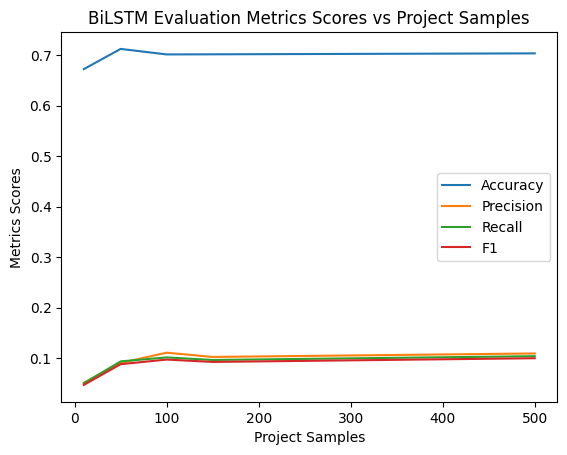

In [ ]:
plt.plot(all_samples, all_bilstm_acc, label = "Accuracy")
plt.plot(all_samples, all_bilstm_precision, label = "Precision")
plt.plot(all_samples, all_bilstm_recall, label = "Recall")
plt.plot(all_samples,all_bilstm_f1score, label = "F1")
plt.xlabel('Project Samples')
plt.ylabel('Metrics Scores')
plt.title('BiLSTM Evaluation Metrics Scores vs Project Samples')
#plt.xticks(ticks=range(int(min(all_samples)), int(max(all_samples)) + 1))
plt.legend()
plt.savefig(f"/content/plot_results/bilstm_projsamples_evaluation_metrics.pdf")
plt.show()

convert metrics to list

In [ ]:
all_groups_10_proj_accuracy = df_nltk_10_projects['accuracy'].tolist()
all_groups_50_proj_accuracy = df_nltk_50_projects['accuracy'].tolist()
all_groups_100_proj_accuracy = df_nltk_100_projects['accuracy'].tolist()
all_groups_150_proj_accuracy = df_nltk_150_projects['accuracy'].tolist()
all_groups_500_proj_accuracy = df_nltk_500_projects['accuracy'].tolist()
print(type(all_groups_10_proj_accuracy))

<class 'list'>


In [ ]:
all_groups_10_proj_precision = df_nltk_10_projects['precision'].tolist()
all_groups_50_proj_precision = df_nltk_50_projects['precision'].tolist()
all_groups_100_proj_precision = df_nltk_100_projects['precision'].tolist()
all_groups_150_proj_precision = df_nltk_150_projects['precision'].tolist()
all_groups_500_proj_precision = df_nltk_500_projects['precision'].tolist()
print(type(all_groups_10_proj_precision))

<class 'list'>


In [ ]:
all_groups_10_proj_recall = df_nltk_10_projects['recall'].tolist()
all_groups_50_proj_recall = df_nltk_50_projects['recall'].tolist()
all_groups_100_proj_recall = df_nltk_100_projects['recall'].tolist()
all_groups_150_proj_recall = df_nltk_150_projects['recall'].tolist()
all_groups_500_proj_recall = df_nltk_500_projects['recall'].tolist()
print(type(all_groups_10_proj_recall))

<class 'list'>


In [ ]:
all_groups_10_proj_f1score = df_nltk_10_projects['f1score'].tolist()
all_groups_50_proj_f1score = df_nltk_50_projects['f1score'].tolist()
all_groups_100_proj_f1score = df_nltk_100_projects['f1score'].tolist()
all_groups_150_proj_f1score = df_nltk_150_projects['f1score'].tolist()
all_groups_500_proj_f1score = df_nltk_500_projects['f1score'].tolist()
print(type(all_groups_10_proj_f1score))

<class 'list'>


In [ ]:
calc_stats(bilstm_all_groups_10_proj_f1score,"f1score",10)
#calc_stats(bilstm_all_groups_50_proj_recall,"recall",50)
#calc_stats(bilstm_all_groups_100_proj_recall,"recall",100)
#calc_stats(bilstm_all_groups_150_proj_recall,"recall",150)
#calc_stats(bilstm_all_groups_500_proj_recall,"recall",500)

First Quartile for 10 projects metrics f1score => 0.0451039031068445
Third Quartile for 10 projects metrics f1score => 0.046207672358254
Inter Quartile Range for 10 projects metrics f1score => 0.0011037692514095018
Median for 10 projects metrics f1score => 0.046177948067364
Minimum value for 10 projects metrics f1score => 0.0431890704305447
Maximum value for 10 projects metrics f1score => 0.0523896922307887
Outliers values for 10 projects metrics f1score => [0.0431890704305447, 0.0523896922307887]


In [ ]:
calc_stats(all_groups_10_proj_f1score,"f1score",10)
calc_stats(all_groups_50_proj_f1score,"f1score",50)
calc_stats(all_groups_100_proj_f1score,"f1score",100)
calc_stats(all_groups_150_proj_f1score,"f1score",150)
calc_stats(all_groups_500_proj_f1score,"f1score",500)

First Quartile for 10 projects metrics f1score => 0.0319310153155185
Third Quartile for 10 projects metrics f1score => 0.0335066444140197
Inter Quartile Range for 10 projects metrics f1score => 0.0015756290985012023
Median for 10 projects metrics f1score => 0.0331743755174498
Minimum value for 10 projects metrics f1score => 0.0007589278488306
Maximum value for 10 projects metrics f1score => 0.0341661667466286
Outliers values for 10 projects metrics f1score => [0.0007589278488306, 0.0007589278488306, 0.0007589278488306, 0.0007589278488306, 0.0007589278488306]
First Quartile for 50 projects metrics f1score => 0.0647345380187648
Third Quartile for 50 projects metrics f1score => 0.0700898631595424
Inter Quartile Range for 50 projects metrics f1score => 0.005355325140777592
Median for 50 projects metrics f1score => 0.0693949486387991
Minimum value for 50 projects metrics f1score => 0.00119047524481
Maximum value for 50 projects metrics f1score => 0.0704515579930828
Outliers values for 50 pr

In [ ]:

def kruskal_test(grp1,grp2,grp3,grp4,grp5,metrics):
  result_metric = kruskal(grp1,grp2,grp3,grp4,grp5)
  print(f"kruskal {metrics} ", result_metric)

# Perform the Kruskal-Wallis test:
#result_accuracy = kruskal(all_groups_10_proj_accuracy, all_groups_50_proj_accuracy, all_groups_100_proj_accuracy, all_groups_150_proj_accuracy, all_groups_500_proj_accuracy)
#result_precision = kruskal(all_groups_10_proj_precision, all_groups_50_proj_precision, all_groups_100_proj_precision, all_groups_150_proj_precision, all_groups_500_proj_precision)
#result_recall = kruskal(all_groups_10_proj_recall, all_groups_50_proj_recall, all_groups_100_proj_recall, all_groups_150_proj_recall, all_groups_500_proj_recall)
#result_f1score = kruskal(all_groups_10_proj_f1score, all_groups_50_proj_f1score, all_groups_100_proj_f1score, all_groups_150_proj_f1score, all_groups_500_proj_f1score)


#print("kruskal accuracy",result_accuracy)
#print("kruskal precision",result_precision)
#print("kruskal recall",result_recall)
#print("kruskal f1score",result_f1score)

In [ ]:
kruskal_test(all_groups_10_proj_accuracy,all_groups_50_proj_accuracy,all_groups_100_proj_accuracy,all_groups_150_proj_accuracy,all_groups_500_proj_accuracy,"accuracy")

kruskal accuracy  KruskalResult(statistic=15.084725949370997, pvalue=0.004528677565600756)


  Create a dataframe for all projects sub samples

In [ ]:
ngram = list(range(2,7))

In [ ]:
all_instances = [32054, 212971, 561321, 719366,885995]

In [ ]:
df_accuracy_nltk_all = pd.DataFrame({'10-projects-nltk-accuracy':df_nltk_10_projects['accuracy'],'50-projects-nltk-accuracy':df_nltk_50_projects['accuracy'],'100-projects-nltk-accuracy':df_nltk_100_projects['accuracy'],'150-projects-nltk-accuracy':df_nltk_150_projects['accuracy'],'500-projects-nltk-accuracy':df_nltk_500_projects['accuracy']})
df_precision_nltk_all = pd.DataFrame({'10-projects-nltk':df_nltk_10_projects['precision'],'50-projects-nltk-precision':df_nltk_50_projects['precision'],'100-projects-nltk-precision':df_nltk_100_projects['precision'],'150-projects-nltk-precision':df_nltk_150_projects['precision'],'500-projects-nltk-precision':df_nltk_500_projects['precision']})
df_recall_nltk_all = pd.DataFrame({'10-projects-nltk-recall':df_nltk_10_projects['recall'],'50-projects-nltk-recall':df_nltk_50_projects['recall'],'100-projects-nltk-recall':df_nltk_100_projects['recall'],'150-projects-nltk-recall':df_nltk_150_projects['recall'],'500-projects-nltk-recall':df_nltk_500_projects['recall']})
df_f1score_nltk_all = pd.DataFrame({'10-projects-nltk-f1score':df_nltk_10_projects['f1score'],'50-projects-nltk-f1score':df_nltk_50_projects['f1score'],'100-projects-nltk-f1score':df_nltk_100_projects['f1score'],'150-projects-nltk-f1score':df_nltk_150_projects['f1score'],'500-projects-nltk-f1score':df_nltk_500_projects['f1score']})

In [ ]:
print(df_accuracy_nltk_all)

    10-projects-nltk-accuracy  50-projects-nltk-accuracy  \
0                    0.016409                   0.014851   
1                    0.016409                   0.014851   
2                    0.016409                   0.014851   
3                    0.016409                   0.014851   
4                    0.016409                   0.014851   
5                    0.062467                   0.102912   
6                    0.062467                   0.102912   
7                    0.062467                   0.103390   
8                    0.062467                   0.103390   
9                    0.062907                   0.103180   
10                   0.102382                   0.191031   
11                   0.102425                   0.190964   
12                   0.102382                   0.190247   
13                   0.102907                   0.190964   
14                   0.102382                   0.191031   
15                   0.125853           

In [ ]:
df_nltk_10_proj = pd.DataFrame({'ngram':df_nltk_10_projects['ngram'],'accuracy':df_nltk_10_projects['accuracy'],'precision':df_nltk_10_projects['precision'],'recall':df_nltk_10_projects['recall'],'f1score':df_nltk_10_projects['f1score']})
df_nltk_50_proj = pd.DataFrame({'ngram':df_nltk_50_projects['ngram'],'accuracy':df_nltk_50_projects['accuracy'],'precision':df_nltk_50_projects['precision'],'recall':df_nltk_50_projects['recall'],'f1score':df_nltk_50_projects['f1score']})
df_nltk_100_proj = pd.DataFrame({'ngram':df_nltk_100_projects['ngram'],'accuracy':df_nltk_100_projects['accuracy'],'precision':df_nltk_100_projects['precision'],'recall':df_nltk_100_projects['recall'],'f1score':df_nltk_100_projects['f1score']})
df_nltk_150_proj = pd.DataFrame({'ngram':df_nltk_150_projects['ngram'],'accuracy':df_nltk_150_projects['accuracy'],'precision':df_nltk_150_projects['precision'],'recall':df_nltk_150_projects['recall'],'f1score':df_nltk_150_projects['f1score']})
df_nltk_500_proj = pd.DataFrame({'ngram':df_nltk_500_projects['ngram'],'accuracy':df_nltk_500_projects['accuracy'],'precision':df_nltk_500_projects['precision'],'recall':df_nltk_500_projects['recall'],'f1score':df_nltk_500_projects['f1score']})

In [ ]:
all_ngrams_nltk = df_nltk_10_projects['ngram'].tolist() + df_nltk_50_projects['ngram'].tolist() + df_nltk_100_projects['ngram'].tolist() + df_nltk_150_projects['ngram'].tolist() + df_nltk_500_projects['ngram'].tolist()
all_accuracy_nltk = df_nltk_10_projects['accuracy'].tolist() + df_nltk_50_projects['accuracy'].tolist() + df_nltk_100_projects['accuracy'].tolist() + df_nltk_150_projects['accuracy'].tolist() + df_nltk_500_projects['accuracy'].tolist()
dataframenltk = pd.DataFrame({'ngrams':all_ngrams_nltk,'accuracy':all_accuracy_nltk})
print(dataframenltk)
print(all_accuracy_nltk)

     ngrams  accuracy
0         2  0.016409
1         2  0.016409
2         2  0.016409
3         2  0.016409
4         2  0.016409
..      ...       ...
120       6  0.275191
121       6  0.275191
122       6  0.275191
123       6  0.274321
124       6  0.275191

[125 rows x 2 columns]
[0.01640935409684, 0.01640935409684, 0.01640935409684, 0.01640935409684, 0.01640935409684, 0.0624674275277433, 0.0624674275277433, 0.0624674275277433, 0.0624674275277433, 0.0629073053182181, 0.1023815557329941, 0.1024245872559754, 0.1023815557329941, 0.1029074965694313, 0.1023815557329941, 0.1258528608790862, 0.1264361770794983, 0.1258958924020674, 0.1258958924020674, 0.1258528608790862, 0.1486643493394661, 0.1486643493394661, 0.1491616024939158, 0.1486213178164849, 0.1491616024939158, 0.0148506567088534, 0.0148506567088534, 0.0148506567088534, 0.0148506567088534, 0.0148506567088534, 0.1029122778497626, 0.1029122778497626, 0.1033904058828873, 0.1033904058828873, 0.1031800295483124, 0.1910312743546466, 0

In [ ]:
def compute_avg_per_gram(ngram_order,df_projects,metrics_val):
  filtered_2grams = df_projects[df_projects['ngram'] == ngram_order]
  #print(filtered_2grams[metrics_val].tolist())
  avg_2grams_acc = (filtered_2grams[metrics_val].sum() / len(filtered_2grams))
  return avg_2grams_acc

In [ ]:
def compute_mannwhitneyutest(grp1,grp2):
  stat,pval = mannwhitneyu(grp1, grp2, alternative='two-sided')
  print(f"Mann-Whitney U Test: U-statistic = {stat}, p-value = {pval}")

In [ ]:
def compute_each_gram_list(data,order,metric):
  filtered_df = data[data['ngrams'] == order]
  #print(filtered_df)
  filtered_acc = filtered_df[metric].tolist()
  print(len(filtered_acc))
  #filtered_metric = filtered_gram[metric].tolist()
  return filtered_acc

In [ ]:
def visualize_diff(dat1,dat2,order,metric):
  data = [dat1 ,dat2]
  labels = ['NLTK(nltk.lm)','KenLM']
  plt.boxplot(data, patch_artist=True, labels=labels)
  plt.title(f"Visualizing Differences between  NLTK and KenLM for order of n-gram {order}")
  plt.ylabel(metric)
  plt.savefig(f"/content/plot_results/visboxplotorder_{order}_upd_{metric}.pdf")
  plt.show()

In [ ]:
def visualize_diff_bar(dat1, dat2, proj_number, metric, label1, label2):
    data = [dat1, dat2]
    labels = [label1, label2]

    #plt.figure(figsize=(4, 4))
    plt.bar(labels, data, color=['blue', 'orange'])
    plt.title(f"Differences between MRR and Accuracy Scores for KenLM({proj_number}) Model")
    plt.ylabel(metric)
    plt.savefig(f"/content/plot_results/visbarchartdiff_mrr_acc_{proj_number}.pdf")
    plt.show()

# Example usage with single values
#visualize_diff_bar(0.5, 0.7, 1, 'MRR/Accuracy', 'MRR', 'Accuracy')


In [ ]:
def visualize_diff_upd(dat1,dat2,proj_number,metric,label1,label2):
  data = [dat1 ,dat2]
  labels = [label1,label2]
  plt.boxplot(data, patch_artist=True, labels=labels)
  plt.title(f"Visualizing Differences MRR and Accuracy Scores for KenLM Model for {proj_number} projects")
  plt.ylabel(metric)
  plt.savefig(f"/content/plot_results/visboxplotdiff_mrr_acc_{proj_number}.pdf")
  plt.show()

In [ ]:
all_accuracy_grams_10_projects = [compute_avg_per_gram(i,df_nltk_10_proj,'accuracy') for i in range(2,7)]
all_precision_grams_10_projects = [compute_avg_per_gram(i,df_nltk_10_proj,'precision') for i in range(2,7)]
all_f1score_grams_10_projects = [compute_avg_per_gram(i,df_nltk_10_proj,'f1score') for i in range(2,7)]
all_recall_grams_10_projects = [compute_avg_per_gram(i,df_nltk_10_proj,'recall') for i in range(2,7)]

In [ ]:
all_accuracy_grams_50_projects = [compute_avg_per_gram(i,df_nltk_50_proj,'accuracy') for i in range(2,7)]
all_precision_grams_50_projects = [compute_avg_per_gram(i,df_nltk_50_proj,'precision') for i in range(2,7)]
all_f1score_grams_50_projects = [compute_avg_per_gram(i,df_nltk_50_proj,'f1score') for i in range(2,7)]
all_recall_grams_50_projects = [compute_avg_per_gram(i,df_nltk_50_proj,'recall') for i in range(2,7)]

In [ ]:
all_accuracy_grams_100_projects = [compute_avg_per_gram(i,df_nltk_100_proj,'accuracy') for i in range(2,7)]
all_precision_grams_100_projects = [compute_avg_per_gram(i,df_nltk_100_proj,'precision') for i in range(2,7)]
all_f1score_grams_100_projects = [compute_avg_per_gram(i,df_nltk_100_proj,'f1score') for i in range(2,7)]
all_recall_grams_100_projects = [compute_avg_per_gram(i,df_nltk_100_proj,'recall') for i in range(2,7)]

In [ ]:
all_accuracy_grams_150_projects = [compute_avg_per_gram(i,df_nltk_150_proj,'accuracy') for i in range(2,7)]
all_precision_grams_150_projects = [compute_avg_per_gram(i,df_nltk_150_proj,'precision') for i in range(2,7)]
all_f1score_grams_150_projects = [compute_avg_per_gram(i,df_nltk_150_proj,'f1score') for i in range(2,7)]
all_recall_grams_150_projects = [compute_avg_per_gram(i,df_nltk_150_proj,'recall') for i in range(2,7)]

In [ ]:
all_accuracy_grams_500_projects = [compute_avg_per_gram(i,df_nltk_500_proj,'accuracy') for i in range(2,7)]
all_precision_grams_500_projects = [compute_avg_per_gram(i,df_nltk_500_proj,'precision') for i in range(2,7)]
all_f1score_grams_500_projects = [compute_avg_per_gram(i,df_nltk_500_proj,'f1score') for i in range(2,7)]
all_recall_grams_500_projects = [compute_avg_per_gram(i,df_nltk_500_proj,'recall') for i in range(2,7)]

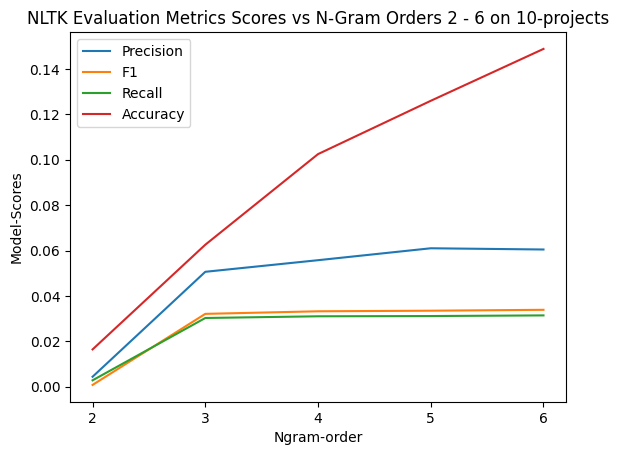

In [ ]:
plt.plot(ngram, all_precision_grams_10_projects, label = "Precision")
plt.plot(ngram,all_f1score_grams_10_projects, label = "F1")
plt.plot(ngram, all_recall_grams_10_projects, label = "Recall")
plt.plot(ngram, all_accuracy_grams_10_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('NLTK Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 10-projects')
# Setting the x-axis to display whole integers
plt.xticks(ticks=range(int(min(ngram)), int(max(ngram)) + 1))
plt.legend()
plt.savefig(f"/content/plot_results/nltk_10_projects_avg_eval_metrics_newmain_final_2_6.pdf")
plt.show()

Compute statistics such as first quartile, third quartile, max for nltk


In [ ]:
calc_stats(all_accuracy_grams_500_projects,"accuracy",10)

First Quartile for 10 projects metrics accuracy => 0.10365720132537089
Third Quartile for 10 projects metrics accuracy => 0.21852363625931753
Inter Quartile Range for 10 projects metrics accuracy => 0.11486643493394665
Median for 10 projects metrics accuracy => 0.17974649651683722
Minimum value for 10 projects metrics accuracy => 0.0166245117117461
Maximum value for 10 projects metrics accuracy => 0.2750173321412008
Outliers values for 10 projects metrics accuracy => []


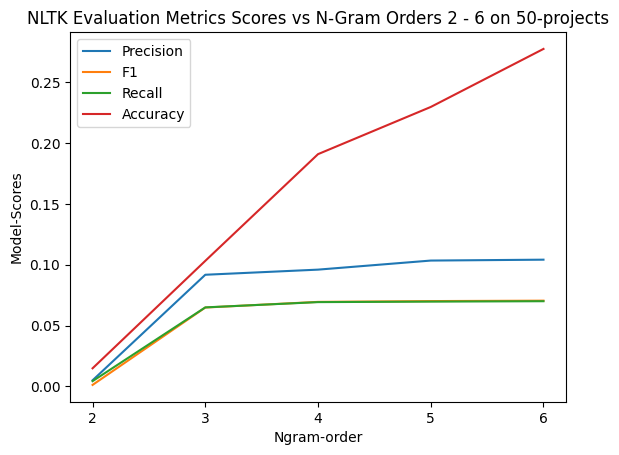

In [ ]:
plt.plot(ngram, all_precision_grams_50_projects, label = "Precision")
plt.plot(ngram,all_f1score_grams_50_projects, label = "F1")
plt.plot(ngram, all_recall_grams_50_projects, label = "Recall")
plt.plot(ngram, all_accuracy_grams_50_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('NLTK Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 50-projects')
# Setting the x-axis to display whole integers
plt.xticks(ticks=range(int(min(ngram)), int(max(ngram)) + 1))
plt.legend()
plt.savefig(f"/content/plot_results/nltk_50_projects_avg_eval_metrics_newmain_final_2_6.pdf")
plt.show()

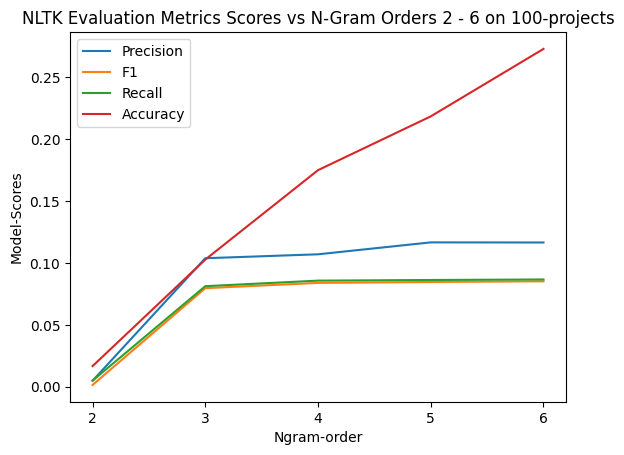

In [ ]:
plt.plot(ngram, all_precision_grams_100_projects, label = "Precision")
plt.plot(ngram,all_f1score_grams_100_projects, label = "F1")
plt.plot(ngram, all_recall_grams_100_projects, label = "Recall")
plt.plot(ngram, all_accuracy_grams_100_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('NLTK Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 100-projects')
# Setting the x-axis to display whole integers
plt.xticks(ticks=range(int(min(ngram)), int(max(ngram)) + 1))
plt.legend()
plt.savefig(f"/content/plot_results/nltk_100_projects_avg_eval_metrics_newmain_final_2_6.pdf")
plt.show()

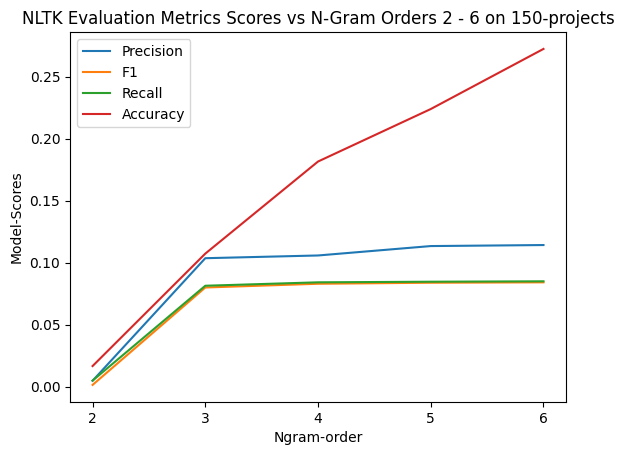

In [ ]:
plt.plot(ngram, all_precision_grams_150_projects, label = "Precision")
plt.plot(ngram,all_f1score_grams_150_projects, label = "F1")
plt.plot(ngram, all_recall_grams_150_projects, label = "Recall")
plt.plot(ngram, all_accuracy_grams_150_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('NLTK Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 150-projects')
# Setting the x-axis to display whole integers
plt.xticks(ticks=range(int(min(ngram)), int(max(ngram)) + 1))
plt.legend()
plt.savefig(f"/content/plot_results/nltk_150_projects_avg_eval_metrics_newmain_final_2_6.pdf")
plt.show()

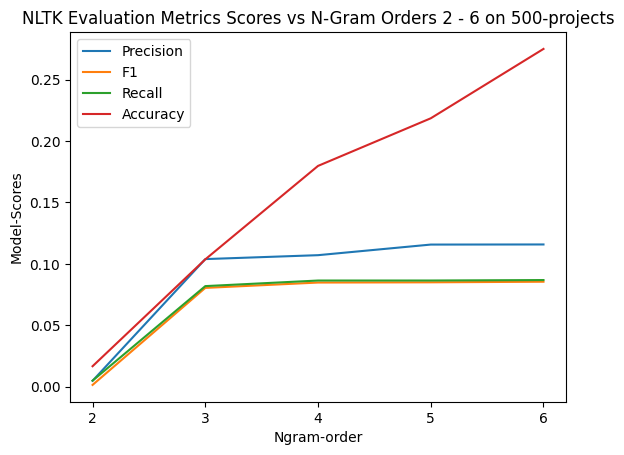

In [ ]:
plt.plot(ngram, all_precision_grams_500_projects, label = "Precision")
plt.plot(ngram,all_f1score_grams_500_projects, label = "F1")
plt.plot(ngram, all_recall_grams_500_projects, label = "Recall")
plt.plot(ngram, all_accuracy_grams_500_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('NLTK Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 500-projects')
# Setting the x-axis to display whole integers
plt.xticks(ticks=range(int(min(ngram)), int(max(ngram)) + 1))
plt.legend()
plt.savefig(f"/content/plot_results/nltk_500_projects_avg_eval_metrics_newmain_final_2_6.pdf")
plt.show()

Plot boxplot for all subsamples accuracy

In [ ]:
df_accuracy_normalized_nltk = pd.DataFrame(scaler.fit_transform(df_accuracy_nltk_all), columns=df_accuracy_nltk_all.columns)

In [ ]:
def plot_boxplot(data_values,title,ylabel,xlabel,figpath):
  # Create the boxplot
  box = plt.boxplot(data_values, patch_artist=True)

  # Set the color for the boxes
  for element in box['boxes']:
      element.set(facecolor='lightgreen')  # You can change 'lightgreen' to any color

  # Set x-axis labels to correspond to project sample sizes
  project_samples = [10, 50, 100, 150, 500]
  plt.xticks(ticks=range(1, len(project_samples) + 1), labels=project_samples)

  # Add titles and labels
  #plt.title("Boxplot of NLTK Accuracy Metrics")
  plt.title(title)
  plt.ylabel(ylabel)
  #plt.ylabel("Accuracy")
  plt.xlabel(xlabel)
  #plt.xlabel("Project Samples")

  # Save the plot
  plt.savefig(figpath)
  #plt.savefig("/content/plot_results/nltk_accuracy_boxplot_min.pdf")
  plt.show()

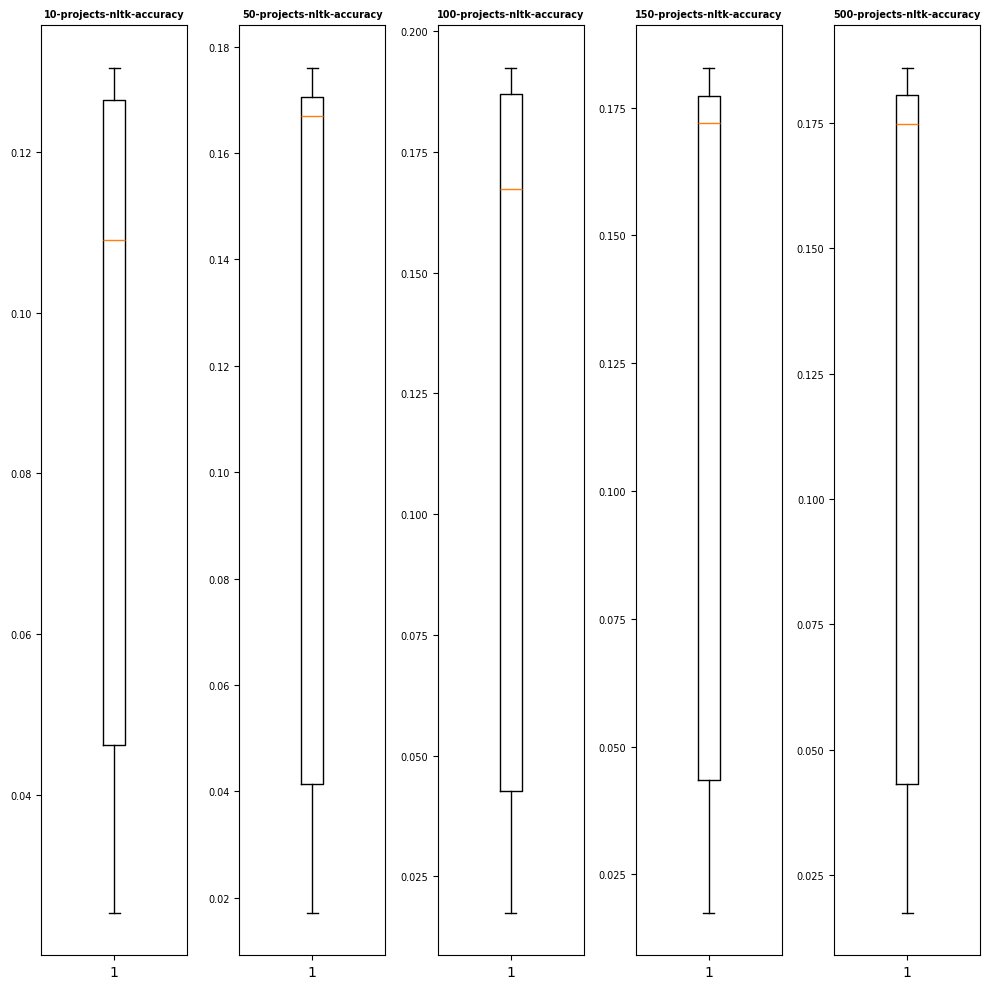

In [ ]:
red_circle = dict(markerfacecolor='red',marker='o',markeredgecolor='white')

fig,axis = plt.subplots(1,len(df_accuracy_nltk_all.columns),figsize=(10,10))
for i,ax in enumerate(axis.flat):
  ax.boxplot(df_accuracy_nltk_all.iloc[:,i],flierprops=red_circle)
  ax.set_title(df_accuracy_nltk_all.columns[i],fontsize=7,fontweight='bold')
  ax.tick_params(axis='y',labelsize=7)


plt.tight_layout()
plt.savefig("/content/plot_results/nltk_accuracy_boxplot.pdf")
#plt.title("Accuracy Data Distribution vs Sub Sampled Projects across 5 runs")

Instances vs Accuracy

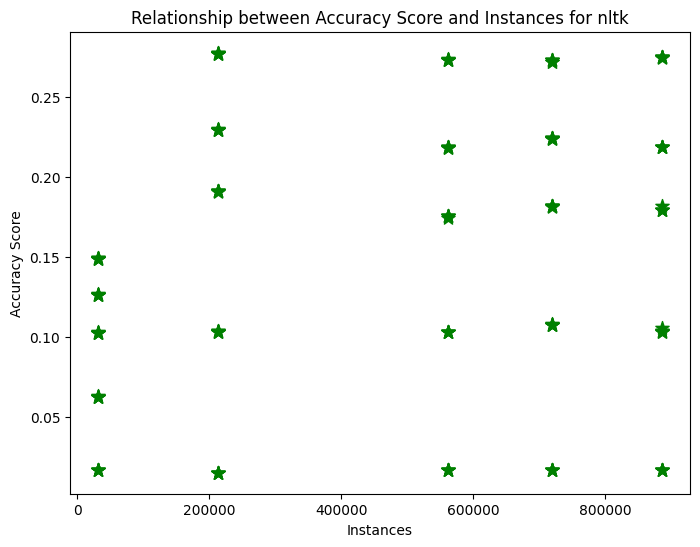

In [ ]:

# Data for recall score and instances
accuracy_data = [
    df_nltk_10_projects['accuracy'],
    df_nltk_50_projects['accuracy'],
    df_nltk_100_projects['accuracy'],
    df_nltk_150_projects['accuracy'],
    df_nltk_500_projects['accuracy']
]

# Corresponding instance counts, repeated 25 times to match the length of each recall data set
instances = [32054] * 25 + [212971] * 25 + [561321] * 25 + [719366] * 25 + [885995] * 25

# Flatten recall_data list to get all data points in a single list
recall_scores = [score for dataset in accuracy_data for score in dataset]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(instances,recall_scores,color='green', marker='*', s=100)  # s=100 for marker size

# Labels and title
plt.xlabel("Instances")
plt.ylabel("Accuracy Score")
plt.title("Relationship between Accuracy Score and Instances for nltk")

# Save as PDF
plt.savefig("/content/plot_results/accuracy_score_vs_instances_plot_nltk.pdf")
plt.show()

KenLM Section

extract in required csv format

In [ ]:
df_kenlm_10_projects = pd.read_csv("/content/models_metrics_data/kenlm/metrics_kenlm_10_pro.csv")
df_kenlm_50_projects = pd.read_csv("/content/models_metrics_data/kenlm/metrics_kenlm_50_pro.csv")
df_kenlm_100_projects = pd.read_csv("/content/models_metrics_data/kenlm/metrics_kenlm_100_pro.csv")
df_kenlm_150_projects = pd.read_csv("/content/models_metrics_data/kenlm/metrics_kenlm_150_pro.csv")
df_kenlm_500_projects = pd.read_csv("/content/models_metrics_data/kenlm/metrics_kenlm_500_pro.csv")


In [ ]:
kenlm_all_groups_10_proj_accuracy = df_kenlm_10_projects['accuracy'].tolist()
kenlm_all_groups_50_proj_accuracy = df_kenlm_50_projects['accuracy'].tolist()
kenlm_all_groups_100_proj_accuracy = df_kenlm_100_projects['accuracy'].tolist()
kenlm_all_groups_150_proj_accuracy = df_kenlm_150_projects['accuracy'].tolist()
kenlm_all_groups_500_proj_accuracy = df_kenlm_500_projects['accuracy'].tolist()
print(type(kenlm_all_groups_10_proj_accuracy))

<class 'list'>


In [ ]:
kenlm_all_groups_10_proj_precision = df_kenlm_10_projects['precision'].tolist()
kenlm_all_groups_50_proj_precision = df_kenlm_50_projects['precision'].tolist()
kenlm_all_groups_100_proj_precision = df_kenlm_100_projects['precision'].tolist()
kenlm_all_groups_150_proj_precision = df_kenlm_150_projects['precision'].tolist()
kenlm_all_groups_500_proj_precision = df_kenlm_500_projects['precision'].tolist()
print(type(kenlm_all_groups_10_proj_precision))

<class 'list'>


In [ ]:
kenlm_all_groups_10_proj_recall = df_kenlm_10_projects['recall'].tolist()
kenlm_all_groups_50_proj_recall = df_kenlm_50_projects['recall'].tolist()
kenlm_all_groups_100_proj_recall = df_kenlm_100_projects['recall'].tolist()
kenlm_all_groups_150_proj_recall = df_kenlm_150_projects['recall'].tolist()
kenlm_all_groups_500_proj_recall = df_kenlm_500_projects['recall'].tolist()
print(type(kenlm_all_groups_10_proj_recall))

<class 'list'>


In [ ]:
kenlm_all_groups_10_proj_f1score = df_kenlm_10_projects['f1score'].tolist()
kenlm_all_groups_50_proj_f1score = df_kenlm_50_projects['f1score'].tolist()
kenlm_all_groups_100_proj_f1score = df_kenlm_100_projects['f1score'].tolist()
kenlm_all_groups_150_proj_f1score = df_kenlm_150_projects['f1score'].tolist()
kenlm_all_groups_500_proj_f1score = df_kenlm_500_projects['f1score'].tolist()
print(type(kenlm_all_groups_10_proj_f1score))

<class 'list'>


In [ ]:
#calc_stats(kenlm_all_groups_10_proj_recall,"recall",10)
#calc_stats(kenlm_all_groups_50_proj_recall,"recall",50)
#calc_stats(kenlm_all_groups_100_proj_recall,"recall",100)
#calc_stats(kenlm_all_groups_150_proj_recall,"recall",150)
calc_stats(kenlm_all_groups_500_proj_recall,"recall",500)

First Quartile for 500 projects metrics recall => 0.0123575287493432
Third Quartile for 500 projects metrics recall => 0.0145614236356316
Inter Quartile Range for 500 projects metrics recall => 0.0022038948862884
Median for 500 projects metrics recall => 0.0130359012148847
Minimum value for 500 projects metrics recall => 0.0120676304184875
Maximum value for 500 projects metrics recall => 0.0215392329621925
Outliers values for 500 projects metrics recall => [0.0215392329621925, 0.0215392329621925, 0.0215392329621925, 0.0215392329621925, 0.0215392329621925]


In [ ]:


# Perform the Kruskal-Wallis test on KenLM:
kenlm_result_accuracy = kruskal(kenlm_all_groups_10_proj_accuracy, kenlm_all_groups_50_proj_accuracy, kenlm_all_groups_100_proj_accuracy, kenlm_all_groups_150_proj_accuracy, kenlm_all_groups_500_proj_accuracy)
kenlm_result_precision = kruskal(kenlm_all_groups_10_proj_precision, kenlm_all_groups_50_proj_precision, kenlm_all_groups_100_proj_precision, kenlm_all_groups_150_proj_precision, kenlm_all_groups_500_proj_precision)
kenlm_result_recall = kruskal(kenlm_all_groups_10_proj_recall, kenlm_all_groups_50_proj_recall, kenlm_all_groups_100_proj_recall, kenlm_all_groups_150_proj_recall, kenlm_all_groups_500_proj_recall)
kenlm_result_f1score = kruskal(kenlm_all_groups_10_proj_f1score, kenlm_all_groups_50_proj_f1score, kenlm_all_groups_100_proj_f1score, kenlm_all_groups_150_proj_f1score, kenlm_all_groups_500_proj_f1score)


print("kruskal accuracy",kenlm_result_accuracy)
print("kruskal precision",kenlm_result_precision)
print("kruskal recall",kenlm_result_recall)
print("kruskal f1score",kenlm_result_f1score)

kruskal accuracy KruskalResult(statistic=0.9538461538461647, pvalue=0.916711787612642)
kruskal precision KruskalResult(statistic=49.02769230769232, pvalue=5.761662533333481e-10)
kruskal recall KruskalResult(statistic=44.4873846153846, pvalue=5.081504229282335e-09)
kruskal f1score KruskalResult(statistic=63.945846153846155, pvalue=4.2903565605806954e-13)


In [ ]:
print(df_kenlm_10_projects)

    run  ngram          vocab_file         model_name  accuracy  precision  \
0     1      2  kenln_order2.vocab  kenln_order2.arpa  0.621237   0.012252   
1     2      2  kenln_order2.vocab  kenln_order2.arpa  0.621237   0.012252   
2     3      2  kenln_order2.vocab  kenln_order2.arpa  0.621237   0.012252   
3     4      2  kenln_order2.vocab  kenln_order2.arpa  0.621237   0.012252   
4     5      2  kenln_order2.vocab  kenln_order2.arpa  0.621237   0.012252   
5     1      3  kenln_order3.vocab  kenln_order3.arpa  0.562326   0.011638   
6     2      3  kenln_order3.vocab  kenln_order3.arpa  0.562326   0.011638   
7     3      3  kenln_order3.vocab  kenln_order3.arpa  0.562326   0.011638   
8     4      3  kenln_order3.vocab  kenln_order3.arpa  0.562326   0.011638   
9     5      3  kenln_order3.vocab  kenln_order3.arpa  0.562326   0.011638   
10    1      4  kenln_order4.vocab  kenln_order4.arpa  0.519481   0.011806   
11    2      4  kenln_order4.vocab  kenln_order4.arpa  0.519481 

In [ ]:
df_accuracy_kenlm_all = pd.DataFrame({'10-projects-kenlm-accuracy':df_kenlm_10_projects['accuracy'],'50-projects-kenlm-accuracy':df_kenlm_50_projects['accuracy'],'100-projects-kenlm-accuracy':df_kenlm_100_projects['accuracy'],'150-projects-kenlm-accuracy':df_kenlm_150_projects['accuracy'],'500-projects-kenlm-accuracy':df_kenlm_500_projects['accuracy']})
df_precision_kenlm_all = pd.DataFrame({'10-projects-kenlm-precision':df_kenlm_10_projects['precision'],'50-projects-kenlm-precision':df_kenlm_50_projects['precision'],'100-projects-kenlm-precision':df_kenlm_100_projects['precision'],'150-projects-kenlm-precision':df_kenlm_150_projects['precision'],'500-projects-kenlm-precision':df_kenlm_500_projects['precision']})
df_recall_kenlm_all = pd.DataFrame({'10-projects-kenlm-recall':df_kenlm_10_projects['recall'],'50-projects-kenlm-recall':df_kenlm_50_projects['recall'],'100-projects-kenlm-recall':df_kenlm_100_projects['recall'],'150-projects-kenlm-recall':df_kenlm_150_projects['recall'],'500-projects-kenlm-recall':df_kenlm_500_projects['recall']})
df_f1score_kenlm_all = pd.DataFrame({'10-projects-kenlm-f1score':df_kenlm_10_projects['f1score'],'50-projects-kenlm-f1score':df_kenlm_50_projects['f1score'],'100-projects-kenlm-f1score':df_kenlm_100_projects['f1score'],'150-projects-kenlm-f1score':df_kenlm_150_projects['f1score'],'500-projects-kenlm-f1score':df_kenlm_500_projects['f1score']})

In [ ]:
print(df_accuracy_kenlm_all)

    10-projects-kenlm-accuracy  50-projects-kenlm-accuracy  \
0                     0.621237                    0.636565   
1                     0.621237                    0.636565   
2                     0.621237                    0.636565   
3                     0.621237                    0.636565   
4                     0.621237                    0.636565   
5                     0.562326                    0.564621   
6                     0.562326                    0.564621   
7                     0.562326                    0.564621   
8                     0.562326                    0.564621   
9                     0.562326                    0.564621   
10                    0.519481                    0.531119   
11                    0.519481                    0.531119   
12                    0.519481                    0.531119   
13                    0.519481                    0.531119   
14                    0.519481                    0.531119   
15      

In [ ]:
df_kenlm_10_proj = pd.DataFrame({'ngram':df_kenlm_10_projects['ngram'],'accuracy':df_kenlm_10_projects['accuracy'],'precision':df_kenlm_10_projects['precision'],'recall':df_kenlm_10_projects['recall'],'f1score':df_kenlm_10_projects['f1score']})
df_kenlm_50_proj = pd.DataFrame({'ngram':df_kenlm_50_projects['ngram'],'accuracy':df_kenlm_50_projects['accuracy'],'precision':df_kenlm_50_projects['precision'],'recall':df_kenlm_50_projects['recall'],'f1score':df_kenlm_50_projects['f1score']})
df_kenlm_100_proj = pd.DataFrame({'ngram':df_kenlm_100_projects['ngram'],'accuracy':df_kenlm_100_projects['accuracy'],'precision':df_kenlm_100_projects['precision'],'recall':df_kenlm_100_projects['recall'],'f1score':df_kenlm_100_projects['f1score']})
df_kenlm_150_proj = pd.DataFrame({'ngram':df_kenlm_150_projects['ngram'],'accuracy':df_kenlm_150_projects['accuracy'],'precision':df_kenlm_150_projects['precision'],'recall':df_kenlm_150_projects['recall'],'f1score':df_kenlm_150_projects['f1score']})
df_kenlm_500_proj = pd.DataFrame({'ngram':df_kenlm_500_projects['ngram'],'accuracy':df_kenlm_500_projects['accuracy'],'precision':df_kenlm_500_projects['precision'],'recall':df_kenlm_500_projects['recall'],'f1score':df_kenlm_500_projects['f1score']})

In [ ]:
all_accuracy_kenlm_10_projects = [compute_avg_per_gram(i,df_kenlm_10_proj,'accuracy') for i in range(2,7)]
all_precision_kenlm_10_projects = [compute_avg_per_gram(i,df_kenlm_10_proj,'precision') for i in range(2,7)]
all_f1score_kenlm_10_projects = [compute_avg_per_gram(i,df_kenlm_10_proj,'f1score') for i in range(2,7)]
all_recall_kenlm_10_projects = [compute_avg_per_gram(i,df_kenlm_10_proj,'recall') for i in range(2,7)]

In [ ]:
all_accuracy_kenlm_50_projects = [compute_avg_per_gram(i,df_kenlm_50_proj,'accuracy') for i in range(2,7)]
all_precision_kenlm_50_projects = [compute_avg_per_gram(i,df_kenlm_50_proj,'precision') for i in range(2,7)]
all_f1score_kenlm_50_projects = [compute_avg_per_gram(i,df_kenlm_50_proj,'f1score') for i in range(2,7)]
all_recall_kenlm_50_projects = [compute_avg_per_gram(i,df_kenlm_50_proj,'recall') for i in range(2,7)]

In [ ]:
all_accuracy_kenlm_100_projects = [compute_avg_per_gram(i,df_kenlm_100_proj,'accuracy') for i in range(2,7)]
all_precision_kenlm_100_projects = [compute_avg_per_gram(i,df_kenlm_100_proj,'precision') for i in range(2,7)]
all_f1score_kenlm_100_projects = [compute_avg_per_gram(i,df_kenlm_100_proj,'f1score') for i in range(2,7)]
all_recall_kenlm_100_projects = [compute_avg_per_gram(i,df_kenlm_100_proj,'recall') for i in range(2,7)]

In [ ]:
all_accuracy_kenlm_150_projects = [compute_avg_per_gram(i,df_kenlm_150_proj,'accuracy') for i in range(2,7)]
all_precision_kenlm_150_projects = [compute_avg_per_gram(i,df_kenlm_150_proj,'precision') for i in range(2,7)]
all_f1score_kenlm_150_projects = [compute_avg_per_gram(i,df_kenlm_150_proj,'f1score') for i in range(2,7)]
all_recall_kenlm_150_projects = [compute_avg_per_gram(i,df_kenlm_150_proj,'recall') for i in range(2,7)]

In [ ]:
all_accuracy_kenlm_500_projects = [compute_avg_per_gram(i,df_kenlm_500_proj,'accuracy') for i in range(2,7)]
all_precision_kenlm_500_projects = [compute_avg_per_gram(i,df_kenlm_500_proj,'precision') for i in range(2,7)]
all_f1score_kenlm_500_projects = [compute_avg_per_gram(i,df_kenlm_500_proj,'f1score') for i in range(2,7)]
all_recall_kenlm_500_projects = [compute_avg_per_gram(i,df_kenlm_500_proj,'recall') for i in range(2,7)]

In [ ]:
all_ngrams_kenlm = df_kenlm_10_projects['ngram'].tolist() + df_kenlm_50_projects['ngram'].tolist() + df_kenlm_100_projects['ngram'].tolist() + df_kenlm_150_projects['ngram'].tolist() + df_kenlm_500_projects['ngram'].tolist()
all_accuracy_kenlm = df_kenlm_10_projects['accuracy'].tolist() + df_kenlm_50_projects['accuracy'].tolist() + df_kenlm_100_projects['accuracy'].tolist() + df_kenlm_150_projects['accuracy'].tolist() + df_kenlm_500_projects['accuracy'].tolist()
dataframekenlm = pd.DataFrame({'ngrams':all_ngrams_kenlm,'accuracy':all_accuracy_kenlm})
print(len(all_accuracy_kenlm))

125


In [ ]:
all_ngrams_nltk = df_nltk_10_projects['ngram'].tolist() + df_nltk_50_projects['ngram'].tolist() + df_nltk_100_projects['ngram'].tolist() + df_nltk_150_projects['ngram'].tolist() + df_nltk_500_projects['ngram'].tolist()
all_precision_nltk = df_nltk_10_projects['precision'].tolist() + df_nltk_50_projects['precision'].tolist() + df_nltk_100_projects['precision'].tolist() + df_nltk_150_projects['precision'].tolist() + df_nltk_500_projects['precision'].tolist()
print(type(all_precision_nltk))
dataframenltk_prec = pd.DataFrame({'ngrams':all_ngrams_nltk,'precision':all_precision_nltk})
print(len(all_precision_nltk))

<class 'list'>
125


In [ ]:
proje_mean_acc10_2 = compute_avg_per_gram(2,df_kenlm_10_proj,'accuracy')
proje_mean_acc50_2 = compute_avg_per_gram(2,df_kenlm_50_proj,'accuracy')
proje_mean_acc100_2 = compute_avg_per_gram(2,df_kenlm_100_proj,'accuracy')
proje_mean_acc150_2 = compute_avg_per_gram(2,df_kenlm_150_proj,'accuracy')
proje_mean_acc500_2 = compute_avg_per_gram(2,df_kenlm_500_proj,'accuracy')
print(proje_mean_acc100_2)

0.6332279857900348


In [ ]:
compute_mannwhitneyutest(proje_mean_acc100_2,0.334067)

Mann-Whitney U Test: U-statistic = 1.0, p-value = 1.0


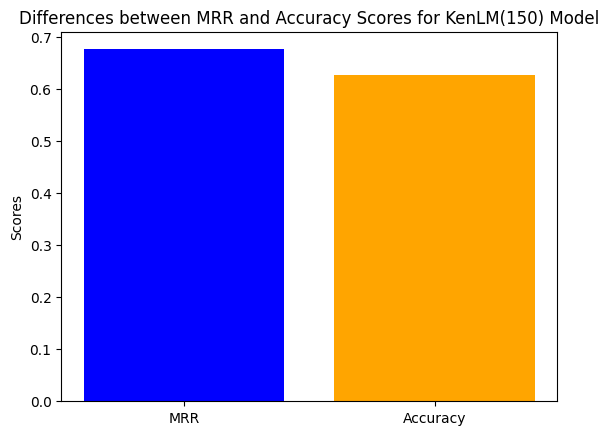

In [ ]:
visualize_diff_bar(0.67626,proje_mean_acc150_2,150,'Scores',"MRR","Accuracy")

In [ ]:
def compute_data(list_of_ngrams_projects,list_of_metrics_projects):
  all_ngrams = []
  all_metrics = []
  for all_grams in list_of_ngrams_projects:
    all_ngrams.extend(all_grams)
  for each_metric in list_of_metrics_projects:
    all_metrics.extend(each_metric)
  return all_ngrams,all_metrics

In [ ]:
def get_dataframe(data1,data2,metric):
  dataframe = pd.DataFrame({'ngrams':data1,metric:data2})
  return dataframe


25
25
Mann-Whitney U Test: U-statistic = 625.0, p-value = 7.363641649288995e-10


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


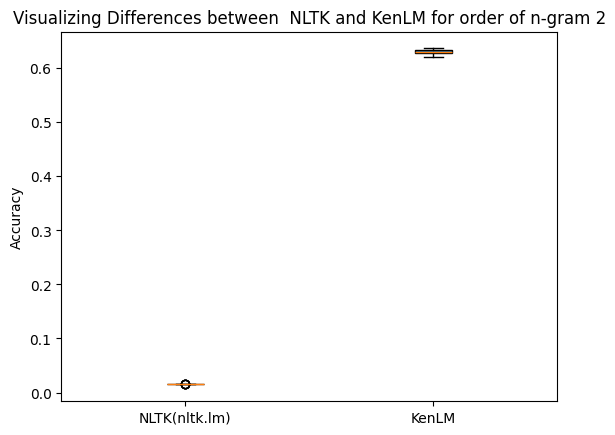

In [ ]:
accuracy_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(),df_nltk_50_projects['ngram'].tolist(),df_nltk_100_projects['ngram'].tolist(),df_nltk_150_projects['ngram'].tolist(),df_nltk_500_projects['ngram'].tolist()],[df_nltk_10_projects['accuracy'].tolist(),df_nltk_50_projects['accuracy'].tolist(),df_nltk_100_projects['accuracy'].tolist(),df_nltk_150_projects['accuracy'].tolist(),df_nltk_500_projects['accuracy'].tolist()])
accuracy_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(),df_kenlm_50_projects['ngram'].tolist(),df_kenlm_100_projects['ngram'].tolist(),df_kenlm_150_projects['ngram'].tolist(),df_kenlm_500_projects['ngram'].tolist()],[df_kenlm_10_projects['accuracy'].tolist(),df_kenlm_50_projects['accuracy'].tolist(),df_kenlm_100_projects['accuracy'].tolist(),df_kenlm_150_projects['accuracy'].tolist(),df_kenlm_500_projects['accuracy'].tolist()])
df_nltk_accuracy_2 = get_dataframe(accuracy_nltk[0],accuracy_nltk[1],'accuracy')
df_kenlm_accuracy_2 = get_dataframe(accuracy_kenlm[0],accuracy_kenlm[1],'accuracy')
kenlm_order_accuracy_2 = compute_each_gram_list(df_kenlm_accuracy_2,2,'accuracy')
nltk_order_accuracy_2 = compute_each_gram_list(df_nltk_accuracy_2,2,'accuracy')
mann = compute_mannwhitneyutest(kenlm_order_accuracy_2,nltk_order_accuracy_2)
visualize_diff(nltk_order_accuracy_2,kenlm_order_accuracy_2,2,'Accuracy')

25
25
Mann-Whitney U Test: U-statistic = 625.0, p-value = 7.363641649288995e-10


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


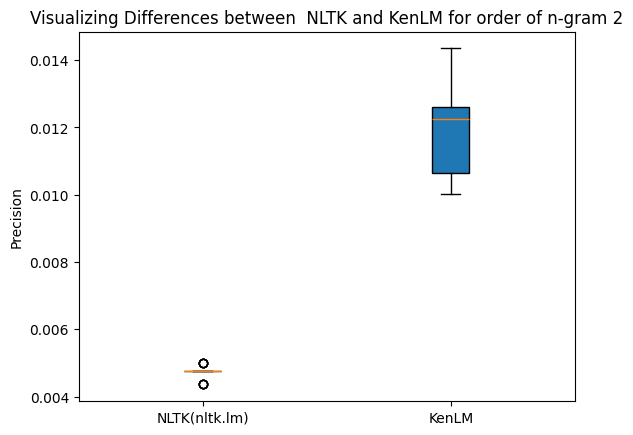

In [ ]:
precision_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(),df_nltk_50_projects['ngram'].tolist(),df_nltk_100_projects['ngram'].tolist(),df_nltk_150_projects['ngram'].tolist(),df_nltk_500_projects['ngram'].tolist()],[df_nltk_10_projects['precision'].tolist(),df_nltk_50_projects['precision'].tolist(),df_nltk_100_projects['precision'].tolist(),df_nltk_150_projects['precision'].tolist(),df_nltk_500_projects['precision'].tolist()])
precision_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(),df_kenlm_50_projects['ngram'].tolist(),df_kenlm_100_projects['ngram'].tolist(),df_kenlm_150_projects['ngram'].tolist(),df_kenlm_500_projects['ngram'].tolist()],[df_kenlm_10_projects['precision'].tolist(),df_kenlm_50_projects['precision'].tolist(),df_kenlm_100_projects['precision'].tolist(),df_kenlm_150_projects['precision'].tolist(),df_kenlm_500_projects['precision'].tolist()])
df_nltk_precision_2 = get_dataframe(precision_nltk[0],precision_nltk[1],'precision')
df_kenlm_precision_2 = get_dataframe(precision_kenlm[0],precision_kenlm[1],'precision')
kenlm_order_precision_2 = compute_each_gram_list(df_kenlm_precision_2,2,'precision')
nltk_order_precision_2 = compute_each_gram_list(df_nltk_precision_2,2,'precision')
mann = compute_mannwhitneyutest(kenlm_order_precision_2,nltk_order_precision_2)
visualize_diff(nltk_order_precision_2,kenlm_order_precision_2,2,'Precision')

25
25
Mann-Whitney U Test: U-statistic = 625.0, p-value = 7.363641649288995e-10


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


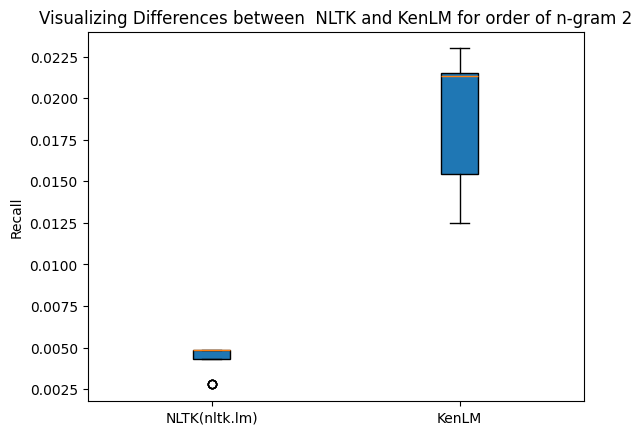

In [ ]:
recall_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(),df_nltk_50_projects['ngram'].tolist(),df_nltk_100_projects['ngram'].tolist(),df_nltk_150_projects['ngram'].tolist(),df_nltk_500_projects['ngram'].tolist()],[df_nltk_10_projects['recall'].tolist(),df_nltk_50_projects['recall'].tolist(),df_nltk_100_projects['recall'].tolist(),df_nltk_150_projects['recall'].tolist(),df_nltk_500_projects['recall'].tolist()])
recall_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(),df_kenlm_50_projects['ngram'].tolist(),df_kenlm_100_projects['ngram'].tolist(),df_kenlm_150_projects['ngram'].tolist(),df_kenlm_500_projects['ngram'].tolist()],[df_kenlm_10_projects['recall'].tolist(),df_kenlm_50_projects['recall'].tolist(),df_kenlm_100_projects['recall'].tolist(),df_kenlm_150_projects['recall'].tolist(),df_kenlm_500_projects['recall'].tolist()])
df_nltk_recall_2 = get_dataframe(recall_nltk[0],recall_nltk[1],'recall')
df_kenlm_recall_2 = get_dataframe(recall_kenlm[0],recall_kenlm[1],'recall')
kenlm_order_recall_2 = compute_each_gram_list(df_kenlm_recall_2,2,'recall')
nltk_order_recall_2 = compute_each_gram_list(df_nltk_recall_2,2,'recall')
mann = compute_mannwhitneyutest(kenlm_order_recall_2,nltk_order_recall_2)
visualize_diff(nltk_order_recall_2,kenlm_order_recall_2,2,'Recall')


25
25
Mann-Whitney U Test: U-statistic = 625.0, p-value = 7.363641649288995e-10


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


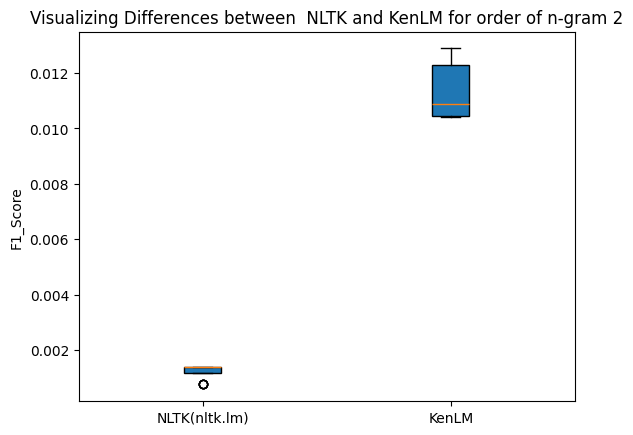

In [ ]:
# Repeat for F1 Score
f1score_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(),df_nltk_50_projects['ngram'].tolist(),df_nltk_100_projects['ngram'].tolist(),df_nltk_150_projects['ngram'].tolist(),df_nltk_500_projects['ngram'].tolist()],[df_nltk_10_projects['f1score'].tolist(),df_nltk_50_projects['f1score'].tolist(),df_nltk_100_projects['f1score'].tolist(),df_nltk_150_projects['f1score'].tolist(),df_nltk_500_projects['f1score'].tolist()])
f1score_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(),df_kenlm_50_projects['ngram'].tolist(),df_kenlm_100_projects['ngram'].tolist(),df_kenlm_150_projects['ngram'].tolist(),df_kenlm_500_projects['ngram'].tolist()],[df_kenlm_10_projects['f1score'].tolist(),df_kenlm_50_projects['f1score'].tolist(),df_kenlm_100_projects['f1score'].tolist(),df_kenlm_150_projects['f1score'].tolist(),df_kenlm_500_projects['f1score'].tolist()])
df_nltk_f1score_2 = get_dataframe(f1score_nltk[0],f1score_nltk[1],'f1score')
df_kenlm_f1score_2 = get_dataframe(f1score_kenlm[0],f1score_kenlm[1],'f1score')
kenlm_order_f1score_2 = compute_each_gram_list(df_kenlm_f1score_2,2,'f1score')
nltk_order_f1score_2 = compute_each_gram_list(df_nltk_f1score_2,2,'f1score')
mann = compute_mannwhitneyutest(kenlm_order_f1score_2,nltk_order_f1score_2)
visualize_diff(nltk_order_f1score_2,kenlm_order_f1score_2,2,'F1_Score')

ngram3


25
25
Mann-Whitney U Test: U-statistic = 625.0, p-value = 1.2602844224964927e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


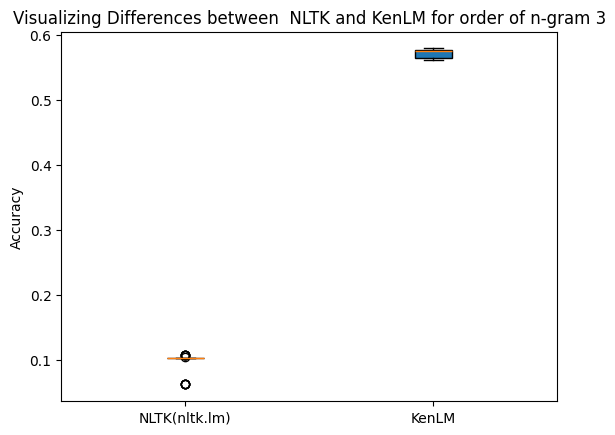

In [ ]:
accuracy_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(),df_nltk_50_projects['ngram'].tolist(),df_nltk_100_projects['ngram'].tolist(),df_nltk_150_projects['ngram'].tolist(),df_nltk_500_projects['ngram'].tolist()],[df_nltk_10_projects['accuracy'].tolist(),df_nltk_50_projects['accuracy'].tolist(),df_nltk_100_projects['accuracy'].tolist(),df_nltk_150_projects['accuracy'].tolist(),df_nltk_500_projects['accuracy'].tolist()])
accuracy_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(),df_kenlm_50_projects['ngram'].tolist(),df_kenlm_100_projects['ngram'].tolist(),df_kenlm_150_projects['ngram'].tolist(),df_kenlm_500_projects['ngram'].tolist()],[df_kenlm_10_projects['accuracy'].tolist(),df_kenlm_50_projects['accuracy'].tolist(),df_kenlm_100_projects['accuracy'].tolist(),df_kenlm_150_projects['accuracy'].tolist(),df_kenlm_500_projects['accuracy'].tolist()])
df_nltk_accuracy_3 = get_dataframe(accuracy_nltk[0],accuracy_nltk[1],'accuracy')
df_kenlm_accuracy_3 = get_dataframe(accuracy_kenlm[0],accuracy_kenlm[1],'accuracy')
kenlm_order_accuracy_3 = compute_each_gram_list(df_kenlm_accuracy_3,3,'accuracy')
nltk_order_accuracy_3 = compute_each_gram_list(df_nltk_accuracy_3,3,'accuracy')
mann = compute_mannwhitneyutest(kenlm_order_accuracy_3,nltk_order_accuracy_3)
visualize_diff(nltk_order_accuracy_3,kenlm_order_accuracy_3,3,'Accuracy')

25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.245392429938658e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


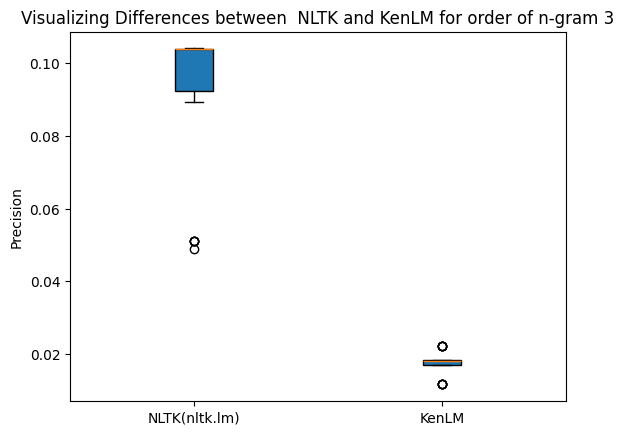

In [ ]:
precision_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['precision'].tolist(), df_nltk_50_projects['precision'].tolist(), df_nltk_100_projects['precision'].tolist(), df_nltk_150_projects['precision'].tolist(), df_nltk_500_projects['precision'].tolist()])
precision_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['precision'].tolist(), df_kenlm_50_projects['precision'].tolist(), df_kenlm_100_projects['precision'].tolist(), df_kenlm_150_projects['precision'].tolist(), df_kenlm_500_projects['precision'].tolist()])
df_nltk_precision_3 = get_dataframe(precision_nltk[0], precision_nltk[1], 'precision')
df_kenlm_precision_3 = get_dataframe(precision_kenlm[0], precision_kenlm[1], 'precision')
kenlm_order_precision_3 = compute_each_gram_list(df_kenlm_precision_3, 3, 'precision')
nltk_order_precision_3 = compute_each_gram_list(df_nltk_precision_3, 3, 'precision')
mann = compute_mannwhitneyutest(kenlm_order_precision_3, nltk_order_precision_3)
visualize_diff(nltk_order_precision_3, kenlm_order_precision_3, 3, 'Precision')


25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.2602844224964927e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


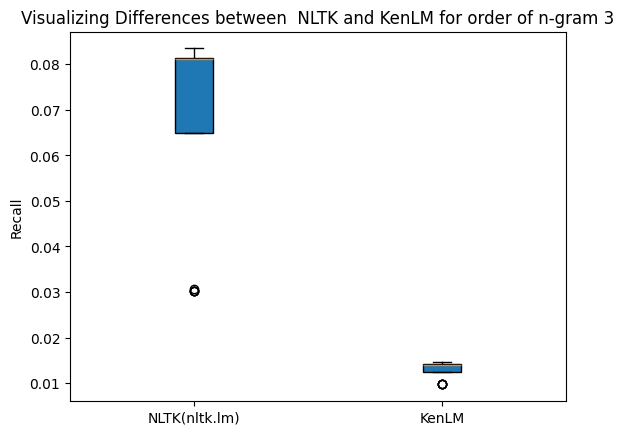

In [ ]:
# Repeat for recall
recall_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['recall'].tolist(), df_nltk_50_projects['recall'].tolist(), df_nltk_100_projects['recall'].tolist(), df_nltk_150_projects['recall'].tolist(), df_nltk_500_projects['recall'].tolist()])
recall_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['recall'].tolist(), df_kenlm_50_projects['recall'].tolist(), df_kenlm_100_projects['recall'].tolist(), df_kenlm_150_projects['recall'].tolist(), df_kenlm_500_projects['recall'].tolist()])
df_nltk_recall_3 = get_dataframe(recall_nltk[0], recall_nltk[1], 'recall')
df_kenlm_recall_3 = get_dataframe(recall_kenlm[0], recall_kenlm[1], 'recall')
kenlm_order_recall_3 = compute_each_gram_list(df_kenlm_recall_3, 3, 'recall')
nltk_order_recall_3 = compute_each_gram_list(df_nltk_recall_3, 3, 'recall')
mann = compute_mannwhitneyutest(kenlm_order_recall_3, nltk_order_recall_3)
visualize_diff(nltk_order_recall_3, kenlm_order_recall_3, 3, 'Recall')


25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.2602844224964927e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


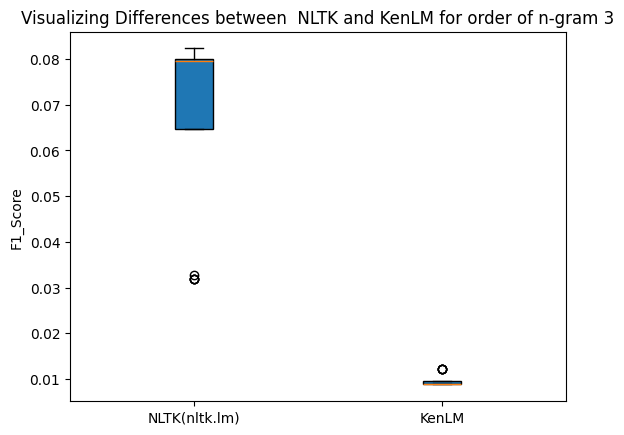

In [ ]:
# Repeat for F1 Score
f1score_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['f1score'].tolist(), df_nltk_50_projects['f1score'].tolist(), df_nltk_100_projects['f1score'].tolist(), df_nltk_150_projects['f1score'].tolist(), df_nltk_500_projects['f1score'].tolist()])
f1score_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['f1score'].tolist(), df_kenlm_50_projects['f1score'].tolist(), df_kenlm_100_projects['f1score'].tolist(), df_kenlm_150_projects['f1score'].tolist(), df_kenlm_500_projects['f1score'].tolist()])
df_nltk_f1score_3 = get_dataframe(f1score_nltk[0], f1score_nltk[1], 'f1score')
df_kenlm_f1score_3 = get_dataframe(f1score_kenlm[0], f1score_kenlm[1], 'f1score')
kenlm_order_f1score_3 = compute_each_gram_list(df_kenlm_f1score_3, 3, 'f1score')
nltk_order_f1score_3 = compute_each_gram_list(df_nltk_f1score_3, 3, 'f1score')
mann = compute_mannwhitneyutest(kenlm_order_f1score_3, nltk_order_f1score_3)
visualize_diff(nltk_order_f1score_3, kenlm_order_f1score_3, 3, 'F1_Score')


ngram 4


25
25
Mann-Whitney U Test: U-statistic = 625.0, p-value = 1.269527794689961e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


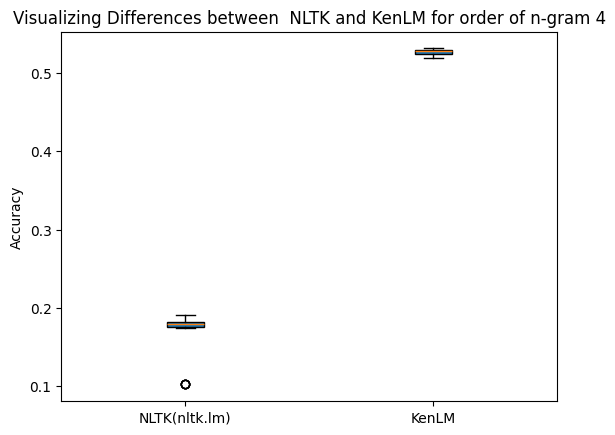

In [ ]:
accuracy_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['accuracy'].tolist(), df_nltk_50_projects['accuracy'].tolist(), df_nltk_100_projects['accuracy'].tolist(), df_nltk_150_projects['accuracy'].tolist(), df_nltk_500_projects['accuracy'].tolist()])
accuracy_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['accuracy'].tolist(), df_kenlm_50_projects['accuracy'].tolist(), df_kenlm_100_projects['accuracy'].tolist(), df_kenlm_150_projects['accuracy'].tolist(), df_kenlm_500_projects['accuracy'].tolist()])
df_nltk_accuracy_4 = get_dataframe(accuracy_nltk[0], accuracy_nltk[1], 'accuracy')
df_kenlm_accuracy_4 = get_dataframe(accuracy_kenlm[0], accuracy_kenlm[1], 'accuracy')
kenlm_order_accuracy_4 = compute_each_gram_list(df_kenlm_accuracy_4, 4, 'accuracy')
nltk_order_accuracy_4 = compute_each_gram_list(df_nltk_accuracy_4, 4, 'accuracy')
mann = compute_mannwhitneyutest(kenlm_order_accuracy_4, nltk_order_accuracy_4)
visualize_diff(nltk_order_accuracy_4, kenlm_order_accuracy_4, 4, 'Accuracy')

25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.2660544399531825e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


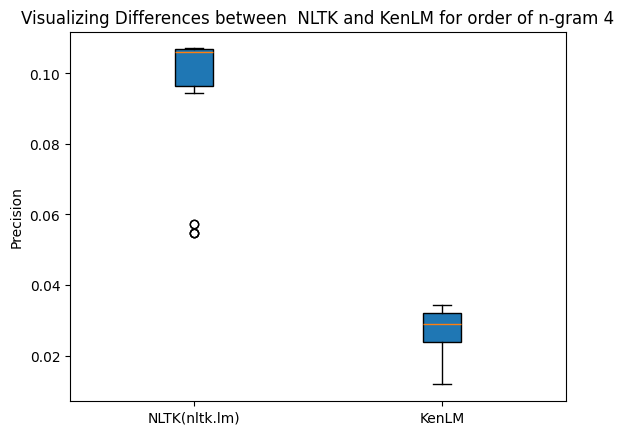

In [ ]:
# Repeat for precision
precision_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['precision'].tolist(), df_nltk_50_projects['precision'].tolist(), df_nltk_100_projects['precision'].tolist(), df_nltk_150_projects['precision'].tolist(), df_nltk_500_projects['precision'].tolist()])
precision_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['precision'].tolist(), df_kenlm_50_projects['precision'].tolist(), df_kenlm_100_projects['precision'].tolist(), df_kenlm_150_projects['precision'].tolist(), df_kenlm_500_projects['precision'].tolist()])
df_nltk_precision_4 = get_dataframe(precision_nltk[0], precision_nltk[1], 'precision')
df_kenlm_precision_4 = get_dataframe(precision_kenlm[0], precision_kenlm[1], 'precision')
kenlm_order_precision_4 = compute_each_gram_list(df_kenlm_precision_4, 4, 'precision')
nltk_order_precision_4 = compute_each_gram_list(df_nltk_precision_4, 4, 'precision')
mann = compute_mannwhitneyutest(kenlm_order_precision_4, nltk_order_precision_4)
visualize_diff(nltk_order_precision_4, kenlm_order_precision_4, 4, 'Precision')

25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.269527794689961e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


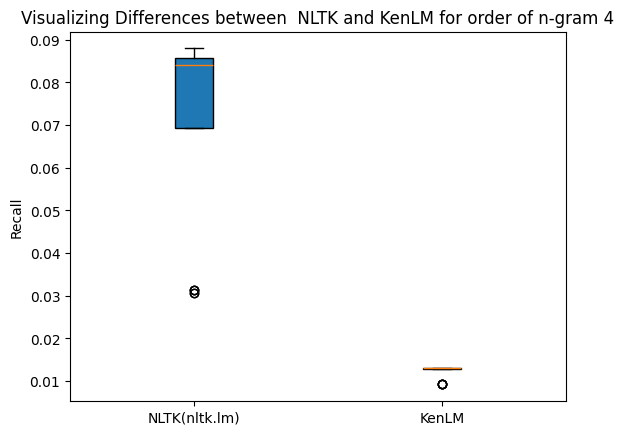

In [ ]:
# Repeat for recall
recall_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['recall'].tolist(), df_nltk_50_projects['recall'].tolist(), df_nltk_100_projects['recall'].tolist(), df_nltk_150_projects['recall'].tolist(), df_nltk_500_projects['recall'].tolist()])
recall_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['recall'].tolist(), df_kenlm_50_projects['recall'].tolist(), df_kenlm_100_projects['recall'].tolist(), df_kenlm_150_projects['recall'].tolist(), df_kenlm_500_projects['recall'].tolist()])
df_nltk_recall_4 = get_dataframe(recall_nltk[0], recall_nltk[1], 'recall')
df_kenlm_recall_4 = get_dataframe(recall_kenlm[0], recall_kenlm[1], 'recall')
kenlm_order_recall_4 = compute_each_gram_list(df_kenlm_recall_4, 4, 'recall')
nltk_order_recall_4 = compute_each_gram_list(df_nltk_recall_4, 4, 'recall')
mann = compute_mannwhitneyutest(kenlm_order_recall_4, nltk_order_recall_4)
visualize_diff(nltk_order_recall_4, kenlm_order_recall_4, 4, 'Recall')

25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.269527794689961e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


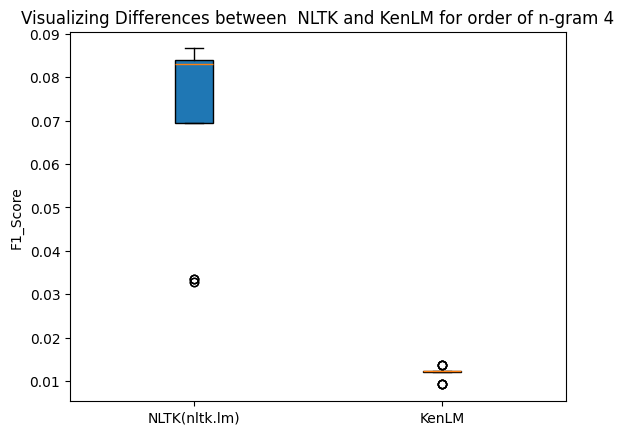

In [ ]:
# Repeat for F1 Score
f1score_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['f1score'].tolist(), df_nltk_50_projects['f1score'].tolist(), df_nltk_100_projects['f1score'].tolist(), df_nltk_150_projects['f1score'].tolist(), df_nltk_500_projects['f1score'].tolist()])
f1score_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['f1score'].tolist(), df_kenlm_50_projects['f1score'].tolist(), df_kenlm_100_projects['f1score'].tolist(), df_kenlm_150_projects['f1score'].tolist(), df_kenlm_500_projects['f1score'].tolist()])
df_nltk_f1score_4 = get_dataframe(f1score_nltk[0], f1score_nltk[1], 'f1score')
df_kenlm_f1score_4 = get_dataframe(f1score_kenlm[0], f1score_kenlm[1], 'f1score')
kenlm_order_f1score_4 = compute_each_gram_list(df_kenlm_f1score_4, 4, 'f1score')
nltk_order_f1score_4 = compute_each_gram_list(df_nltk_f1score_4, 4, 'f1score')
mann = compute_mannwhitneyutest(kenlm_order_f1score_4, nltk_order_f1score_4)
visualize_diff(nltk_order_f1score_4, kenlm_order_f1score_4, 4, 'F1_Score')

ngram 5


25
25
Mann-Whitney U Test: U-statistic = 625.0, p-value = 1.254537965586415e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


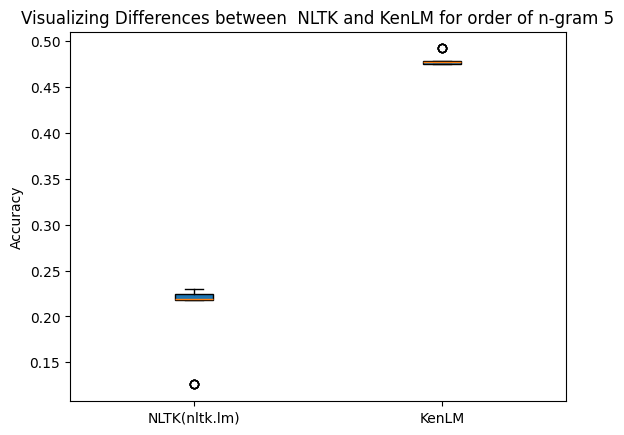

In [ ]:
accuracy_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['accuracy'].tolist(), df_nltk_50_projects['accuracy'].tolist(), df_nltk_100_projects['accuracy'].tolist(), df_nltk_150_projects['accuracy'].tolist(), df_nltk_500_projects['accuracy'].tolist()])
accuracy_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['accuracy'].tolist(), df_kenlm_50_projects['accuracy'].tolist(), df_kenlm_100_projects['accuracy'].tolist(), df_kenlm_150_projects['accuracy'].tolist(), df_kenlm_500_projects['accuracy'].tolist()])
df_nltk_accuracy_5 = get_dataframe(accuracy_nltk[0], accuracy_nltk[1], 'accuracy')
df_kenlm_accuracy_5 = get_dataframe(accuracy_kenlm[0], accuracy_kenlm[1], 'accuracy')
kenlm_order_accuracy_5 = compute_each_gram_list(df_kenlm_accuracy_5, 5, 'accuracy')
nltk_order_accuracy_5 = compute_each_gram_list(df_nltk_accuracy_5, 5, 'accuracy')
mann = compute_mannwhitneyutest(kenlm_order_accuracy_5, nltk_order_accuracy_5)
visualize_diff(nltk_order_accuracy_5, kenlm_order_accuracy_5, 5, 'Accuracy')

25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.2614365384392668e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


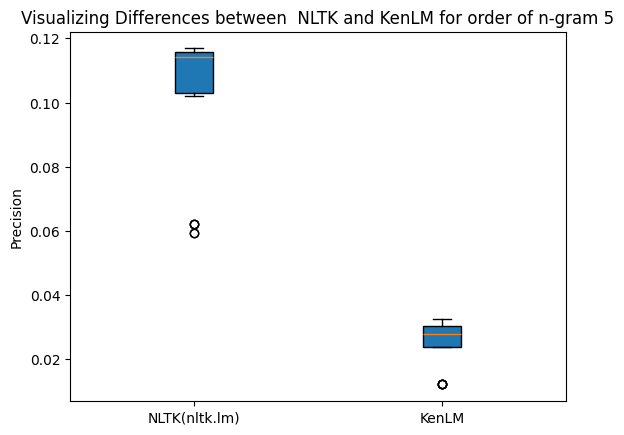

In [ ]:
# Repeat for precision
precision_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['precision'].tolist(), df_nltk_50_projects['precision'].tolist(), df_nltk_100_projects['precision'].tolist(), df_nltk_150_projects['precision'].tolist(), df_nltk_500_projects['precision'].tolist()])
precision_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['precision'].tolist(), df_kenlm_50_projects['precision'].tolist(), df_kenlm_100_projects['precision'].tolist(), df_kenlm_150_projects['precision'].tolist(), df_kenlm_500_projects['precision'].tolist()])
df_nltk_precision_5 = get_dataframe(precision_nltk[0], precision_nltk[1], 'precision')
df_kenlm_precision_5 = get_dataframe(precision_kenlm[0], precision_kenlm[1], 'precision')
kenlm_order_precision_5 = compute_each_gram_list(df_kenlm_precision_5, 5, 'precision')
nltk_order_precision_5 = compute_each_gram_list(df_nltk_precision_5, 5, 'precision')
mann = compute_mannwhitneyutest(kenlm_order_precision_5, nltk_order_precision_5)
visualize_diff(nltk_order_precision_5, kenlm_order_precision_5, 5, 'Precision')

25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.254537965586415e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


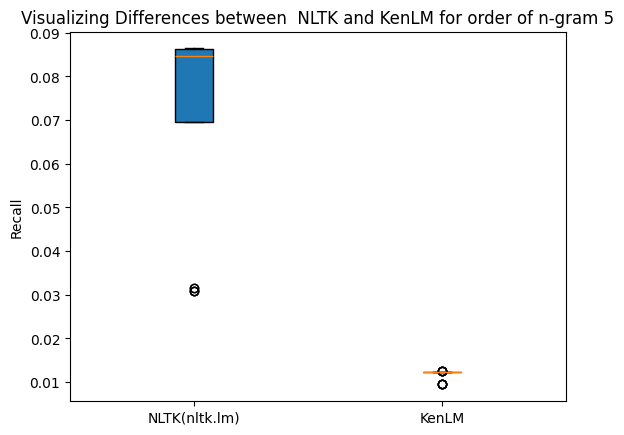

In [ ]:
# Repeat for recall
recall_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['recall'].tolist(), df_nltk_50_projects['recall'].tolist(), df_nltk_100_projects['recall'].tolist(), df_nltk_150_projects['recall'].tolist(), df_nltk_500_projects['recall'].tolist()])
recall_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['recall'].tolist(), df_kenlm_50_projects['recall'].tolist(), df_kenlm_100_projects['recall'].tolist(), df_kenlm_150_projects['recall'].tolist(), df_kenlm_500_projects['recall'].tolist()])
df_nltk_recall_5 = get_dataframe(recall_nltk[0], recall_nltk[1], 'recall')
df_kenlm_recall_5 = get_dataframe(recall_kenlm[0], recall_kenlm[1], 'recall')
kenlm_order_recall_5 = compute_each_gram_list(df_kenlm_recall_5, 5, 'recall')
nltk_order_recall_5 = compute_each_gram_list(df_nltk_recall_5, 5, 'recall')
mann = compute_mannwhitneyutest(kenlm_order_recall_5, nltk_order_recall_5)
visualize_diff(nltk_order_recall_5, kenlm_order_recall_5, 5, 'Recall')

25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.2614365384392668e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


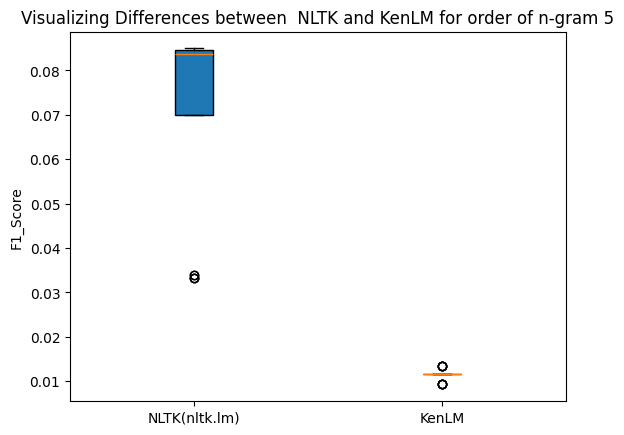

In [ ]:
# Repeat for F1 Score
f1score_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['f1score'].tolist(), df_nltk_50_projects['f1score'].tolist(), df_nltk_100_projects['f1score'].tolist(), df_nltk_150_projects['f1score'].tolist(), df_nltk_500_projects['f1score'].tolist()])
f1score_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['f1score'].tolist(), df_kenlm_50_projects['f1score'].tolist(), df_kenlm_100_projects['f1score'].tolist(), df_kenlm_150_projects['f1score'].tolist(), df_kenlm_500_projects['f1score'].tolist()])
df_nltk_f1score_5 = get_dataframe(f1score_nltk[0], f1score_nltk[1], 'f1score')
df_kenlm_f1score_5 = get_dataframe(f1score_kenlm[0], f1score_kenlm[1], 'f1score')
kenlm_order_f1score_5 = compute_each_gram_list(df_kenlm_f1score_5, 5, 'f1score')
nltk_order_f1score_5 = compute_each_gram_list(df_nltk_f1score_5, 5, 'f1score')
mann = compute_mannwhitneyutest(kenlm_order_f1score_5, nltk_order_f1score_5)
visualize_diff(nltk_order_f1score_5, kenlm_order_f1score_5, 5, 'F1_Score')


ngram6

25
25
Mann-Whitney U Test: U-statistic = 625.0, p-value = 1.2637436002935905e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


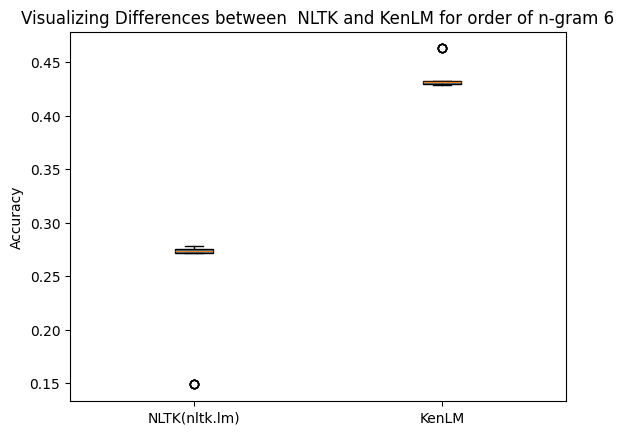

In [ ]:
# Accuracy for n-gram order 6
accuracy_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['accuracy'].tolist(), df_nltk_50_projects['accuracy'].tolist(), df_nltk_100_projects['accuracy'].tolist(), df_nltk_150_projects['accuracy'].tolist(), df_nltk_500_projects['accuracy'].tolist()])
accuracy_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['accuracy'].tolist(), df_kenlm_50_projects['accuracy'].tolist(), df_kenlm_100_projects['accuracy'].tolist(), df_kenlm_150_projects['accuracy'].tolist(), df_kenlm_500_projects['accuracy'].tolist()])
df_nltk_accuracy_6 = get_dataframe(accuracy_nltk[0], accuracy_nltk[1], 'accuracy')
df_kenlm_accuracy_6 = get_dataframe(accuracy_kenlm[0], accuracy_kenlm[1], 'accuracy')
kenlm_order_accuracy_6 = compute_each_gram_list(df_kenlm_accuracy_6, 6, 'accuracy')
nltk_order_accuracy_6 = compute_each_gram_list(df_nltk_accuracy_6, 6, 'accuracy')
mann = compute_mannwhitneyutest(kenlm_order_accuracy_6, nltk_order_accuracy_6)
visualize_diff(nltk_order_accuracy_6, kenlm_order_accuracy_6, 6, 'Accuracy')

25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.2672112781540798e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


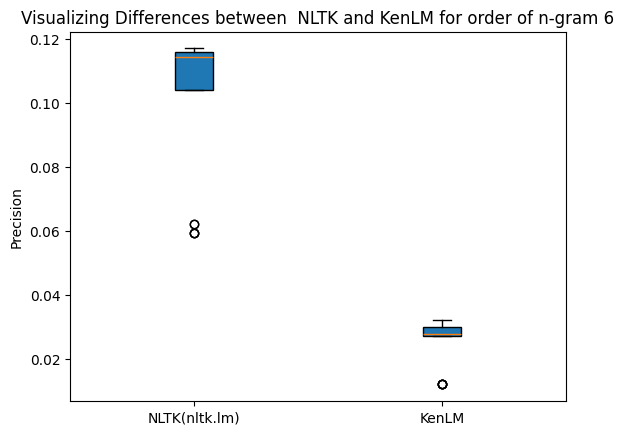

In [ ]:
# Precision for n-gram order 6
precision_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['precision'].tolist(), df_nltk_50_projects['precision'].tolist(), df_nltk_100_projects['precision'].tolist(), df_nltk_150_projects['precision'].tolist(), df_nltk_500_projects['precision'].tolist()])
precision_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['precision'].tolist(), df_kenlm_50_projects['precision'].tolist(), df_kenlm_100_projects['precision'].tolist(), df_kenlm_150_projects['precision'].tolist(), df_kenlm_500_projects['precision'].tolist()])
df_nltk_precision_6 = get_dataframe(precision_nltk[0], precision_nltk[1], 'precision')
df_kenlm_precision_6 = get_dataframe(precision_kenlm[0], precision_kenlm[1], 'precision')
kenlm_order_precision_6 = compute_each_gram_list(df_kenlm_precision_6, 6, 'precision')
nltk_order_precision_6 = compute_each_gram_list(df_nltk_precision_6, 6, 'precision')
mann = compute_mannwhitneyutest(kenlm_order_precision_6, nltk_order_precision_6)
visualize_diff(nltk_order_precision_6, kenlm_order_precision_6, 6, 'Precision')

25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.2637436002935905e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


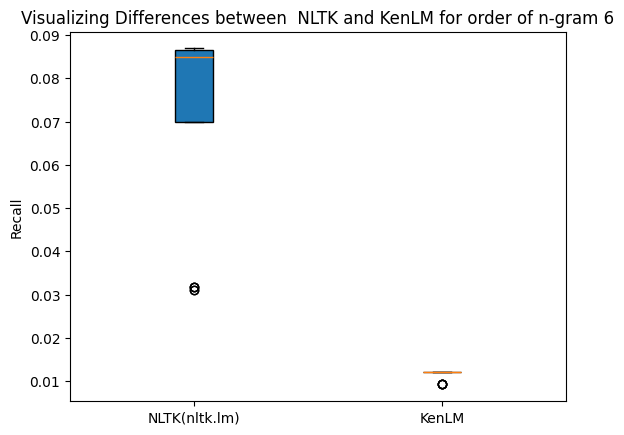

In [ ]:
# Recall for n-gram order 6
recall_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['recall'].tolist(), df_nltk_50_projects['recall'].tolist(), df_nltk_100_projects['recall'].tolist(), df_nltk_150_projects['recall'].tolist(), df_nltk_500_projects['recall'].tolist()])
recall_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['recall'].tolist(), df_kenlm_50_projects['recall'].tolist(), df_kenlm_100_projects['recall'].tolist(), df_kenlm_150_projects['recall'].tolist(), df_kenlm_500_projects['recall'].tolist()])
df_nltk_recall_6 = get_dataframe(recall_nltk[0], recall_nltk[1], 'recall')
df_kenlm_recall_6 = get_dataframe(recall_kenlm[0], recall_kenlm[1], 'recall')
kenlm_order_recall_6 = compute_each_gram_list(df_kenlm_recall_6, 6, 'recall')
nltk_order_recall_6 = compute_each_gram_list(df_nltk_recall_6, 6, 'recall')
mann = compute_mannwhitneyutest(kenlm_order_recall_6, nltk_order_recall_6)
visualize_diff(nltk_order_recall_6, kenlm_order_recall_6, 6, 'Recall')

25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.2672112781540798e-09


<ipython-input-37-db5164be11ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


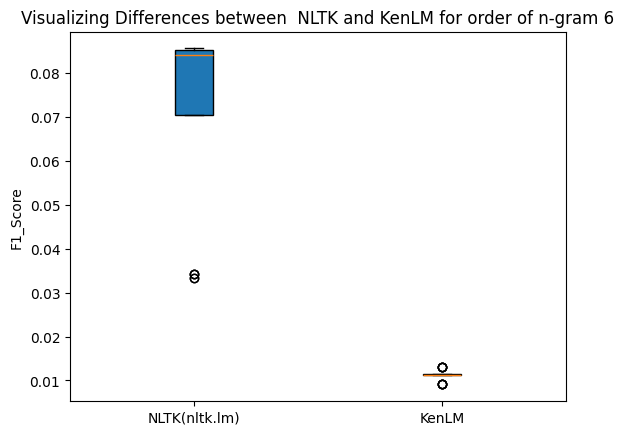

In [ ]:
# F1 Score for n-gram order 6
f1score_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(), df_nltk_50_projects['ngram'].tolist(), df_nltk_100_projects['ngram'].tolist(), df_nltk_150_projects['ngram'].tolist(), df_nltk_500_projects['ngram'].tolist()], [df_nltk_10_projects['f1score'].tolist(), df_nltk_50_projects['f1score'].tolist(), df_nltk_100_projects['f1score'].tolist(), df_nltk_150_projects['f1score'].tolist(), df_nltk_500_projects['f1score'].tolist()])
f1score_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(), df_kenlm_50_projects['ngram'].tolist(), df_kenlm_100_projects['ngram'].tolist(), df_kenlm_150_projects['ngram'].tolist(), df_kenlm_500_projects['ngram'].tolist()], [df_kenlm_10_projects['f1score'].tolist(), df_kenlm_50_projects['f1score'].tolist(), df_kenlm_100_projects['f1score'].tolist(), df_kenlm_150_projects['f1score'].tolist(), df_kenlm_500_projects['f1score'].tolist()])
df_nltk_f1score_6 = get_dataframe(f1score_nltk[0], f1score_nltk[1], 'f1score')
df_kenlm_f1score_6 = get_dataframe(f1score_kenlm[0], f1score_kenlm[1], 'f1score')
kenlm_order_f1score_6 = compute_each_gram_list(df_kenlm_f1score_6, 6, 'f1score')
nltk_order_f1score_6 = compute_each_gram_list(df_nltk_f1score_6, 6, 'f1score')
mann = compute_mannwhitneyutest(kenlm_order_f1score_6, nltk_order_f1score_6)
visualize_diff(nltk_order_f1score_6, kenlm_order_f1score_6, 6, 'F1_Score')

In [ ]:
print(len(df_nltk_10_projects['ngram'].tolist()))

25


In [ ]:
recall_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(),df_nltk_50_projects['ngram'].tolist(),df_nltk_100_projects['ngram'].tolist(),df_nltk_150_projects['ngram'].tolist(),df_nltk_500_projects['ngram'].tolist()],[df_nltk_10_projects['recall'].tolist(),df_nltk_50_projects['recall'].tolist(),df_nltk_100_projects['recall'].tolist(),df_nltk_150_projects['recall'].tolist(),df_nltk_500_projects['recall'].tolist()])

In [ ]:
recall_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(),df_kenlm_50_projects['ngram'].tolist(),df_kenlm_100_projects['ngram'].tolist(),df_kenlm_150_projects['ngram'].tolist(),df_kenlm_500_projects['ngram'].tolist()],[df_kenlm_10_projects['recall'].tolist(),df_kenlm_50_projects['recall'].tolist(),df_kenlm_100_projects['recall'].tolist(),df_kenlm_150_projects['recall'].tolist(),df_kenlm_500_projects['recall'].tolist()])

In [ ]:
f1_nltk = compute_data([df_nltk_10_projects['ngram'].tolist(),df_nltk_50_projects['ngram'].tolist(),df_nltk_100_projects['ngram'].tolist(),df_nltk_150_projects['ngram'].tolist(),df_nltk_500_projects['ngram'].tolist()],[df_nltk_10_projects['f1score'].tolist(),df_nltk_50_projects['f1score'].tolist(),df_nltk_100_projects['f1score'].tolist(),df_nltk_150_projects['f1score'].tolist(),df_nltk_500_projects['f1score'].tolist()])

In [ ]:
f1_kenlm = compute_data([df_kenlm_10_projects['ngram'].tolist(),df_kenlm_50_projects['ngram'].tolist(),df_kenlm_100_projects['ngram'].tolist(),df_kenlm_150_projects['ngram'].tolist(),df_kenlm_500_projects['ngram'].tolist()],[df_kenlm_10_projects['f1score'].tolist(),df_kenlm_50_projects['f1score'].tolist(),df_kenlm_100_projects['f1score'].tolist(),df_kenlm_150_projects['f1score'].tolist(),df_kenlm_500_projects['f1score'].tolist()])

In [ ]:
df_kenlm_man = get_dataframe(recall_kenlm[0],recall_kenlm[1],'recall')
df_nltk_man = get_dataframe(recall_nltk[0],recall_nltk[1],'recall')
rec_ord_kenlm = compute_each_gram_list(df_kenlm_man,2,'recall')
rec_ord_nltk = compute_each_gram_list(df_nltk_man,2,'recall')
print(rec_ord_kenlm)
print(rec_ord_nltk)
mann = compute_mannwhitneyutest(rec_ord_kenlm , rec_ord_nltk)

25
25
[0.0124853356430997, 0.0124853356430997, 0.0124853356430997, 0.0124853356430997, 0.0124853356430997, 0.015448547550886, 0.015448547550886, 0.015448547550886, 0.015448547550886, 0.015448547550886, 0.0229833177571667, 0.0229833177571667, 0.0229833177571667, 0.0229833177571667, 0.0229833177571667, 0.021350656457278, 0.021350656457278, 0.021350656457278, 0.021350656457278, 0.021350656457278, 0.0215392329621925, 0.0215392329621925, 0.0215392329621925, 0.0215392329621925, 0.0215392329621925]
[0.0027888141504885, 0.0027888141504885, 0.0027888141504885, 0.0027888141504885, 0.0027888141504885, 0.0042940175573105, 0.0042940175573105, 0.0042940175573105, 0.0042940175573105, 0.0042940175573105, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115, 0.0048646344776115]
Ma

In [ ]:
df_kenlm_man = get_dataframe(f1_kenlm[0],f1_kenlm[1],'f1score')
df_nltk_man = get_dataframe(f1_nltk[0],f1_nltk[1],'f1score')
f1_ord_kenlm = compute_each_gram_list(df_kenlm_man,2,'f1score')
f1_ord_nltk = compute_each_gram_list(df_nltk_man,2,'f1score')
print(f1_ord_kenlm)
print(f1_ord_nltk)
mann = compute_mannwhitneyutest(f1_ord_kenlm , f1_ord_nltk)

25
25
[0.010460537259386, 0.010460537259386, 0.010460537259386, 0.010460537259386, 0.010460537259386, 0.0122871342781954, 0.0122871342781954, 0.0122871342781954, 0.0122871342781954, 0.0122871342781954, 0.0128850018043893, 0.0128850018043893, 0.0128850018043893, 0.0128850018043893, 0.0128850018043893, 0.0104276480907821, 0.0104276480907821, 0.0104276480907821, 0.0104276480907821, 0.0104276480907821, 0.0108979092364164, 0.0108979092364164, 0.0108979092364164, 0.0108979092364164, 0.0108979092364164]
[0.0007589278488306, 0.0007589278488306, 0.0007589278488306, 0.0007589278488306, 0.0007589278488306, 0.00119047524481, 0.00119047524481, 0.00119047524481, 0.00119047524481, 0.00119047524481, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605, 0.0013951238709605]
Mann-Wh

In [ ]:
all_ngrams_nltk = df_nltk_10_projects['ngram'].tolist() + df_nltk_50_projects['ngram'].tolist() + df_nltk_100_projects['ngram'].tolist() + df_nltk_150_projects['ngram'].tolist() + df_nltk_500_projects['ngram'].tolist()
all_precision_nltk = df_nltk_10_projects['recall'].tolist() + df_nltk_50_projects['recall'].tolist() + df_nltk_100_projects['precision'].tolist() + df_nltk_150_projects['precision'].tolist() + df_nltk_500_projects['precision'].tolist()
dataframenltk_prec = pd.DataFrame({'ngrams':all_ngrams_nltk,'precision':all_precision_nltk})
print(len(all_precision_nltk))

125


In [ ]:
all_ngrams_kenlm = df_kenlm_10_projects['ngram'].tolist() + df_kenlm_50_projects['ngram'].tolist() + df_kenlm_100_projects['ngram'].tolist() + df_kenlm_150_projects['ngram'].tolist() + df_kenlm_500_projects['ngram'].tolist()
all_precision_kenlm = df_kenlm_10_projects['precision'].tolist() + df_kenlm_50_projects['precision'].tolist() + df_kenlm_100_projects['precision'].tolist() + df_kenlm_150_projects['precision'].tolist() + df_kenlm_500_projects['precision'].tolist()
dataframekenlm_prec = pd.DataFrame({'ngrams':all_ngrams_kenlm,'precision':all_precision_kenlm})
print(len(all_precision_kenlm))

125


In [ ]:
kenlm_order_prec = compute_each_gram_list(dataframekenlm_prec,6,'precision')
nltk_order_prec = compute_each_gram_list(dataframenltk_prec,6,'precision')
mann = compute_mannwhitneyutest(kenlm_order_prec,nltk_order_prec)
print(kenlm_order_prec)
print(nltk_order_prec)


25
25
Mann-Whitney U Test: U-statistic = 0.0, p-value = 1.2672112781540798e-09
[0.0121162234546059, 0.0121162234546059, 0.0121162234546059, 0.0121162234546059, 0.0121162234546059, 0.0271999866033788, 0.0271999866033788, 0.0271999866033788, 0.0271999866033788, 0.0271999866033788, 0.03223722953257, 0.03223722953257, 0.03223722953257, 0.03223722953257, 0.03223722953257, 0.0301776711287415, 0.0301776711287415, 0.0301776711287415, 0.0301776711287415, 0.0301776711287415, 0.0279386602456055, 0.0279386602456055, 0.0279386602456055, 0.0279386602456055, 0.0279386602456055]
[0.0622120567424898, 0.0622120567424898, 0.0592691700776691, 0.0592688794267843, 0.0592691700776691, 0.1041187869307207, 0.1041264656648135, 0.1041187869307207, 0.1041187869307207, 0.1041192646038026, 0.1160351701758877, 0.1160351701758877, 0.1169288300541267, 0.1169280273187449, 0.1169331450762363, 0.1142414506910221, 0.1142407172625128, 0.1142407172625128, 0.1142414506910221, 0.1142414506910221, 0.1157779661122679, 0.1157779

In [ ]:
kenlm_order = compute_each_gram_list(dataframekenlm,2,'accuracy')
nltk_order = compute_each_gram_list(dataframenltk,2,'accuracy')
mann = compute_mannwhitneyutest(kenlm_order,nltk_order)
print(kenlm_order)
print(nltk_order)


25
25
Mann-Whitney U Test: U-statistic = 625.0, p-value = 7.363641649288995e-10
[0.6212365347192671, 0.6212365347192671, 0.6212365347192671, 0.6212365347192671, 0.6212365347192671, 0.6365653194612453, 0.6365653194612453, 0.6365653194612453, 0.6365653194612453, 0.6365653194612453, 0.6332279857900348, 0.6332279857900348, 0.6332279857900348, 0.6332279857900348, 0.6332279857900348, 0.6276864818861194, 0.6276864818861194, 0.6276864818861194, 0.6276864818861194, 0.6276864818861194, 0.6294173053660309, 0.6294173053660309, 0.6294173053660309, 0.6294173053660309, 0.6294173053660309]
[0.01640935409684, 0.01640935409684, 0.01640935409684, 0.01640935409684, 0.01640935409684, 0.0148506567088534, 0.0148506567088534, 0.0148506567088534, 0.0148506567088534, 0.0148506567088534, 0.0166245117117461, 0.0166245117117461, 0.0166245117117461, 0.0166245117117461, 0.0166245117117461, 0.0166245117117461, 0.0166245117117461, 0.0166245117117461, 0.0166245117117461, 0.0166245117117461, 0.0166245117117461, 0.016624

<ipython-input-142-548b6c8bcb6e>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, patch_artist=True, labels=labels)


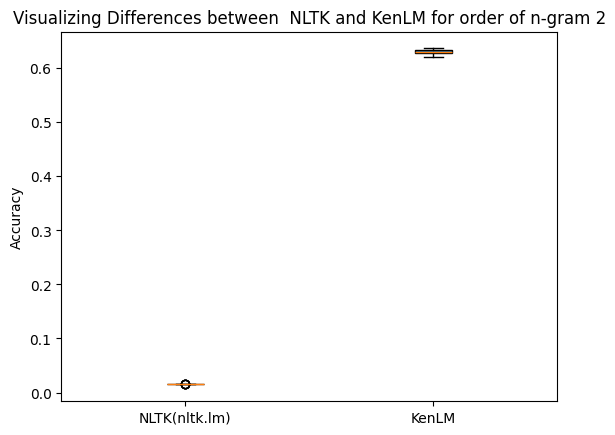

In [ ]:
visualize_diff(nltk_order,kenlm_order,2,'Accuracy')

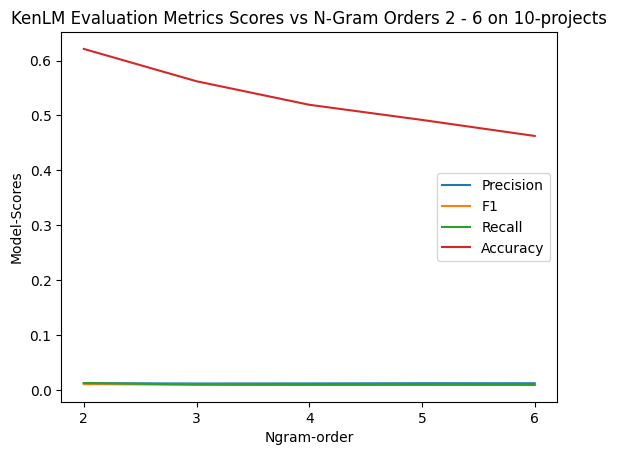

In [ ]:
plt.plot(ngram, all_precision_kenlm_10_projects, label = "Precision")
plt.plot(ngram,all_f1score_kenlm_10_projects, label = "F1")
plt.plot(ngram, all_recall_kenlm_10_projects, label = "Recall")
plt.plot(ngram, all_accuracy_kenlm_10_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('KenLM Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 10-projects')
# Setting the x-axis to display whole integers
plt.xticks(ticks=range(int(min(ngram)), int(max(ngram)) + 1))
plt.legend()
plt.savefig(f"/content/plot_results/kenlm_10_projects_avg_eval_metrics_main_2_6.pdf")
plt.show()

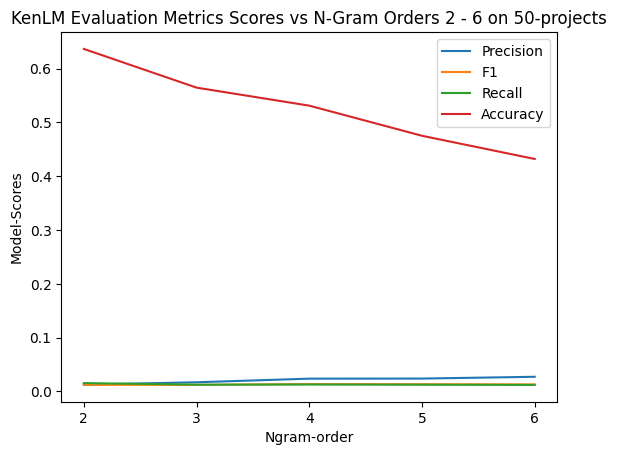

In [ ]:
plt.plot(ngram, all_precision_kenlm_50_projects, label = "Precision")
plt.plot(ngram,all_f1score_kenlm_50_projects, label = "F1")
plt.plot(ngram, all_recall_kenlm_50_projects, label = "Recall")
plt.plot(ngram, all_accuracy_kenlm_50_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('KenLM Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 50-projects')
# Setting the x-axis to display whole integers
plt.xticks(ticks=range(int(min(ngram)), int(max(ngram)) + 1))
plt.legend()
plt.savefig(f"/content/plot_results/kenlm_50_projects_avg_eval_metrics_main_2_6.pdf")
plt.show()

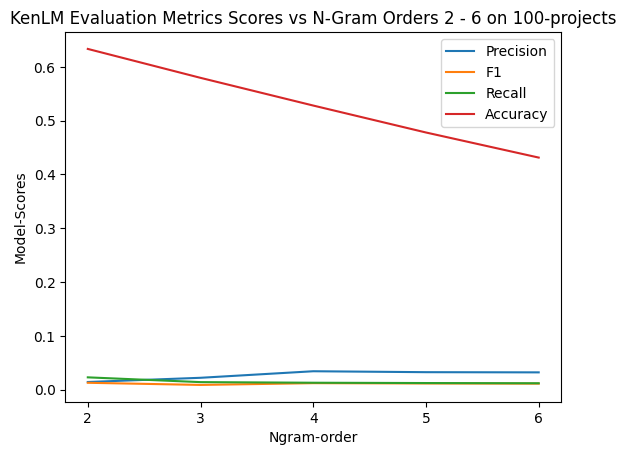

In [ ]:
plt.plot(ngram, all_precision_kenlm_100_projects, label = "Precision")
plt.plot(ngram,all_f1score_kenlm_100_projects, label = "F1")
plt.plot(ngram, all_recall_kenlm_100_projects, label = "Recall")
plt.plot(ngram, all_accuracy_kenlm_100_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('KenLM Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 100-projects')
# Setting the x-axis to display whole integers
plt.xticks(ticks=range(int(min(ngram)), int(max(ngram)) + 1))
plt.legend()
plt.savefig(f"/content/plot_results/kenlm_100_projects_avg_eval_metrics_main_2_6.pdf")
plt.show()

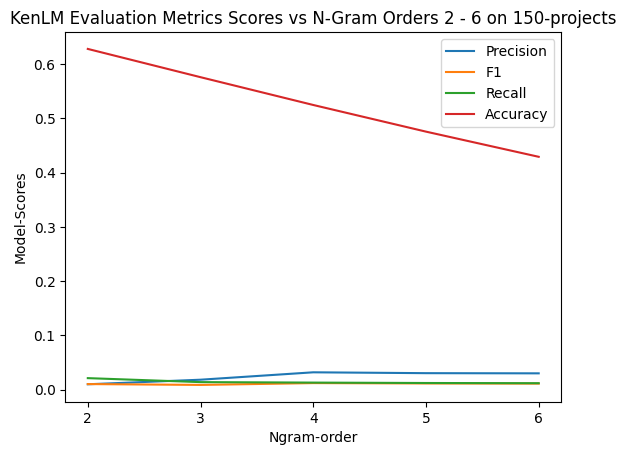

In [ ]:
plt.plot(ngram, all_precision_kenlm_150_projects, label = "Precision")
plt.plot(ngram,all_f1score_kenlm_150_projects, label = "F1")
plt.plot(ngram, all_recall_kenlm_150_projects, label = "Recall")
plt.plot(ngram, all_accuracy_kenlm_150_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('KenLM Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 150-projects')
# Setting the x-axis to display whole integers
plt.xticks(ticks=range(int(min(ngram)), int(max(ngram)) + 1))
plt.legend()
plt.savefig(f"/content/plot_results/kenlm_150_projects_avg_eval_metrics_main_2_6.pdf")
plt.show()

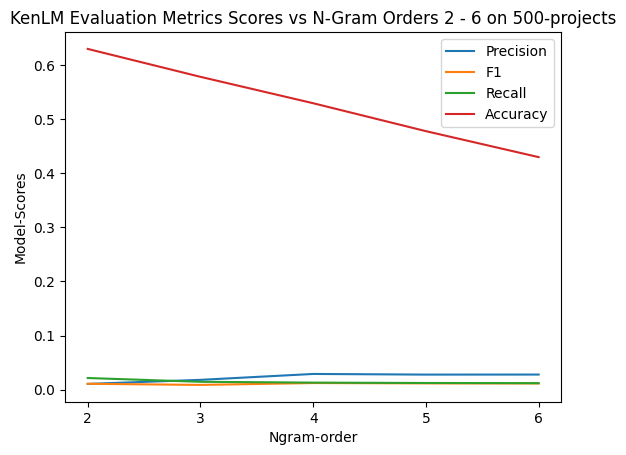

In [ ]:
plt.plot(ngram, all_precision_kenlm_500_projects, label = "Precision")
plt.plot(ngram,all_f1score_kenlm_500_projects, label = "F1")
plt.plot(ngram, all_recall_kenlm_500_projects, label = "Recall")
plt.plot(ngram, all_accuracy_kenlm_500_projects, label = "Accuracy")
plt.xlabel('Ngram-order')
plt.ylabel('Model-Scores')
plt.title('KenLM Evaluation Metrics Scores vs N-Gram Orders 2 - 6 on 500-projects')
# Setting the x-axis to display whole integers
plt.xticks(ticks=range(int(min(ngram)), int(max(ngram)) + 1))
plt.legend()
plt.savefig(f"/content/plot_results/kenlm_500_projects_avg_eval_metrics_main_2_6.pdf")
plt.show()

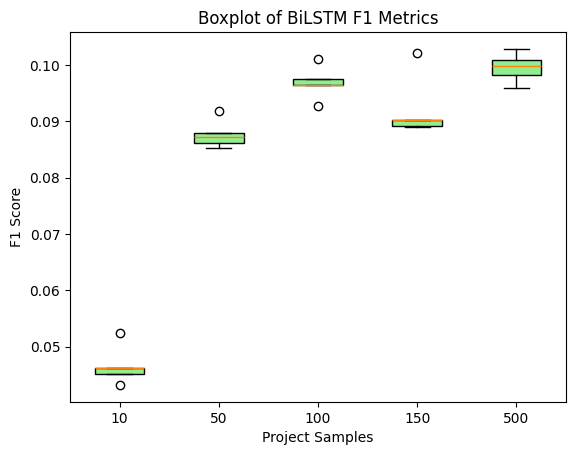

In [ ]:
plot_boxplot(df_f1score_bilstm_all,"Boxplot of BiLSTM F1 Metrics","F1 Score","Project Samples","/content/plot_results/boxplot_bilstm_f1score.pdf")

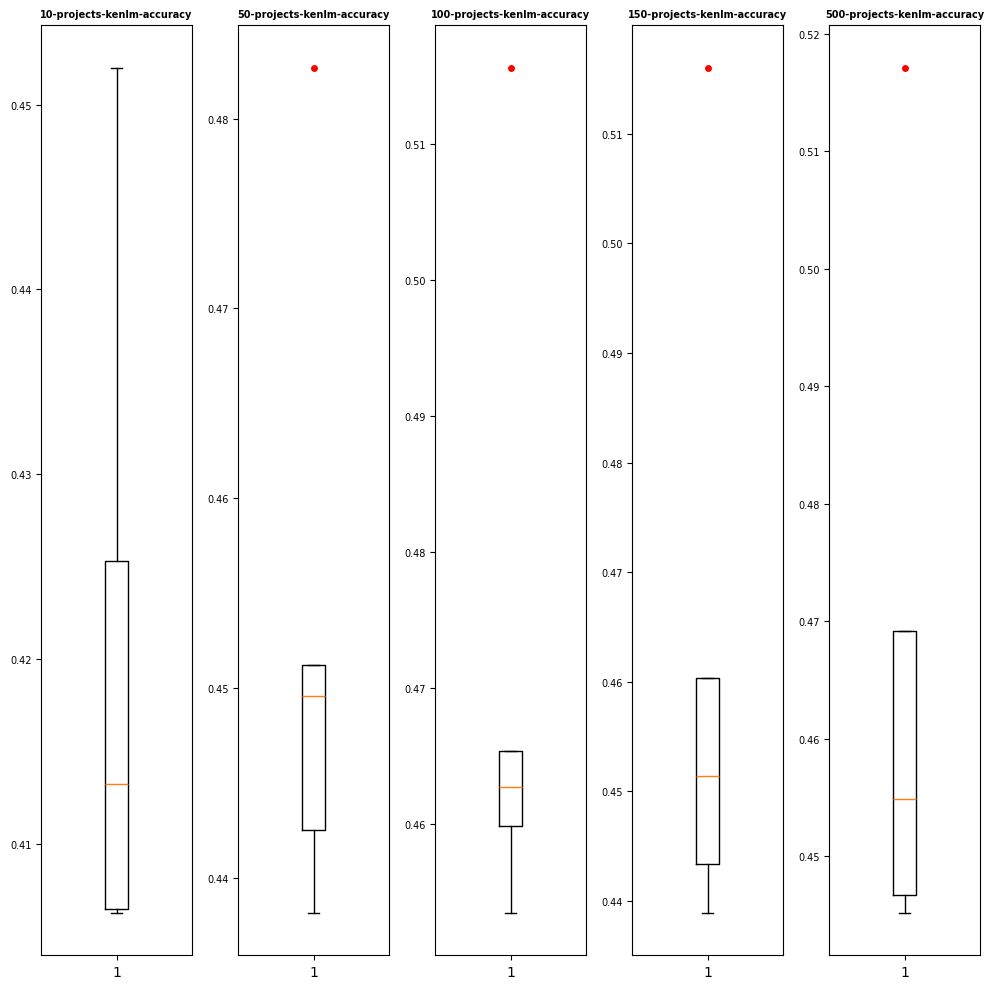

In [ ]:
red_circle = dict(markerfacecolor='red',marker='o',markeredgecolor='white')

fig,axis = plt.subplots(1,len(df_accuracy_kenlm_all.columns),figsize=(10,10))
for i,ax in enumerate(axis.flat):
  ax.boxplot(df_accuracy_kenlm_all.iloc[:,i],flierprops=red_circle)
  ax.set_title(df_accuracy_kenlm_all.columns[i],fontsize=7,fontweight='bold')
  ax.tick_params(axis='y',labelsize=7)


plt.tight_layout()
plt.savefig("/content/plot_results/kenlm_accuracy_boxplot.pdf")
#plt.title("Accuracy Data Distribution vs Sub Sampled Projects across 5 runs")

Normalized plot

In [ ]:
calc_stats(kenlm_all_groups_500_proj_accuracy,"accuracy",500)

First Quartile for 500 projects metrics accuracy => 0.4775160292423105
Third Quartile for 500 projects metrics accuracy => 0.5778559782738621
Inter Quartile Range for 500 projects metrics accuracy => 0.10033994903155163
Median for 500 projects metrics accuracy => 0.5291012627361354
Minimum value for 500 projects metrics accuracy => 0.4295454436789083
Maximum value for 500 projects metrics accuracy => 0.6294173053660309
Outliers values for 500 projects metrics accuracy => []


In [ ]:
df_accuracy_normalized_kenlm = pd.DataFrame(scaler.fit_transform(df_accuracy_kenlm_all), columns=df_accuracy_kenlm_all.columns)

In [ ]:
df_accuracy_normalized_nltk = pd.DataFrame(scaler.fit_transform(df_accuracy_nltk_all), columns=df_accuracy_nltk_all.columns)

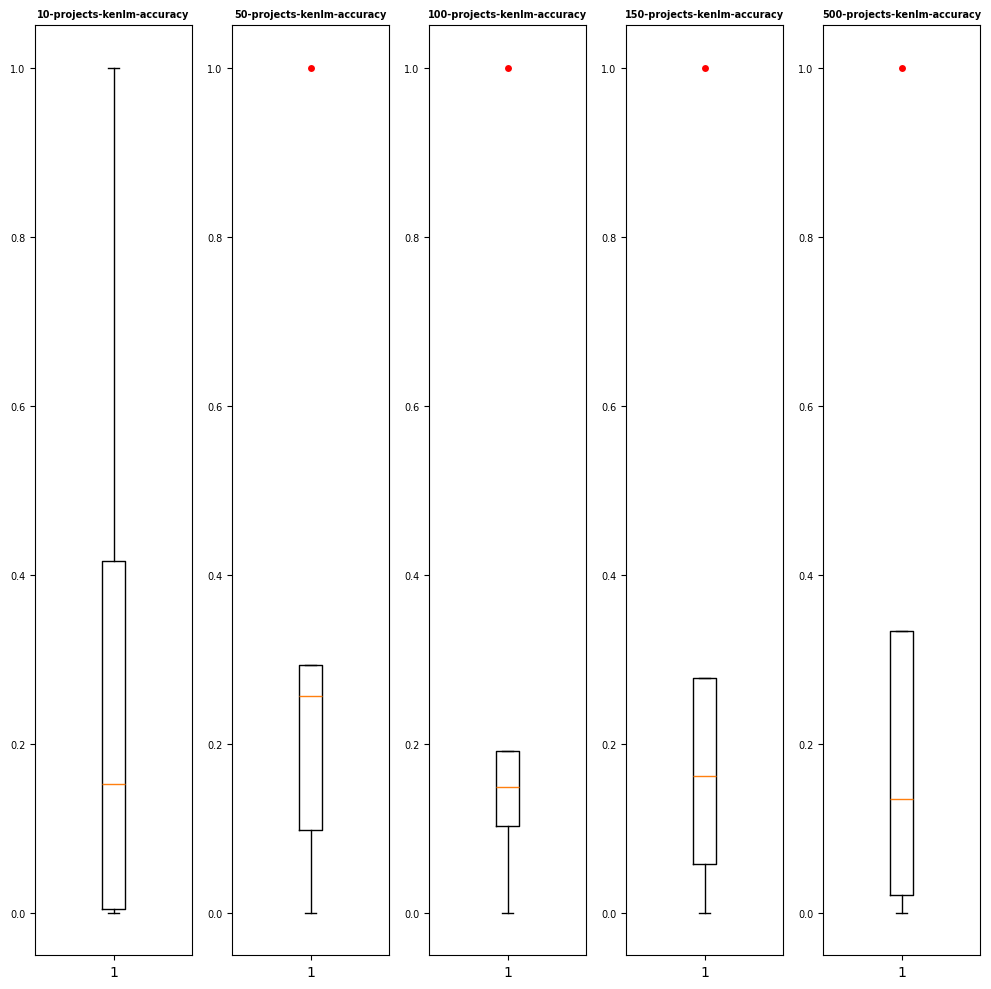

In [ ]:
red_circle = dict(markerfacecolor='red',marker='o',markeredgecolor='white')

fig,axis = plt.subplots(1,len(df_accuracy_normalized_kenlm.columns),figsize=(10,10))
for i,ax in enumerate(axis.flat):
  ax.boxplot(df_accuracy_normalized_kenlm.iloc[:,i],flierprops=red_circle)
  ax.set_title(df_accuracy_normalized_kenlm.columns[i],fontsize=7,fontweight='bold')
  ax.tick_params(axis='y',labelsize=7)


plt.tight_layout()
plt.savefig("/content/plot_results/kenlm_accuracy_boxplot_normalized.pdf")
#plt.title("Accuracy Data Distribution vs Sub Sampled Projects across 5 runs")

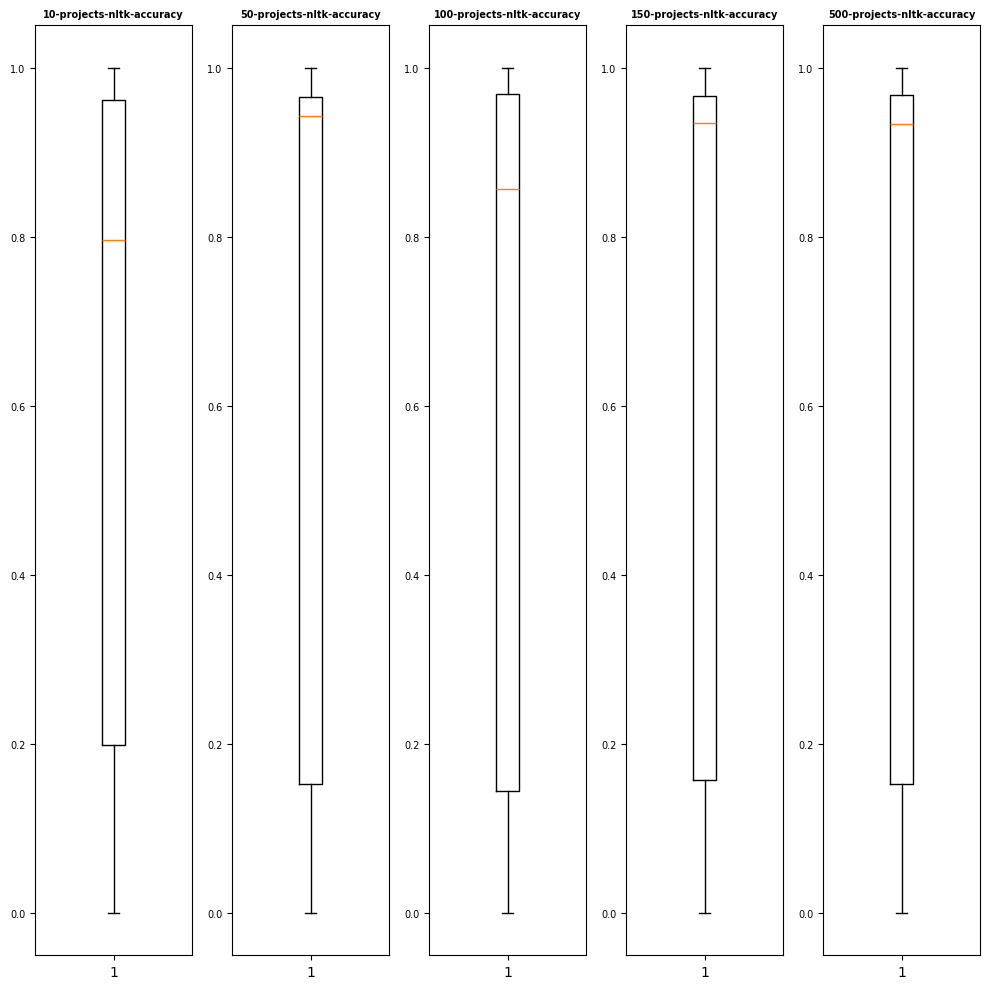

In [ ]:
red_circle = dict(markerfacecolor='red',marker='o',markeredgecolor='white')

fig,axis = plt.subplots(1,len(df_accuracy_normalized_nltk.columns),figsize=(10,10))
for i,ax in enumerate(axis.flat):
  ax.boxplot(df_accuracy_normalized_nltk.iloc[:,i],flierprops=red_circle)
  ax.set_title(df_accuracy_normalized_nltk.columns[i],fontsize=7,fontweight='bold')
  ax.tick_params(axis='y',labelsize=7)


plt.tight_layout()
plt.savefig("/content/plot_results/nltk_accuracy_boxplot_normalized.pdf")
#plt.title("Accuracy Data Distribution vs Sub Sampled Projects across 5 runs")

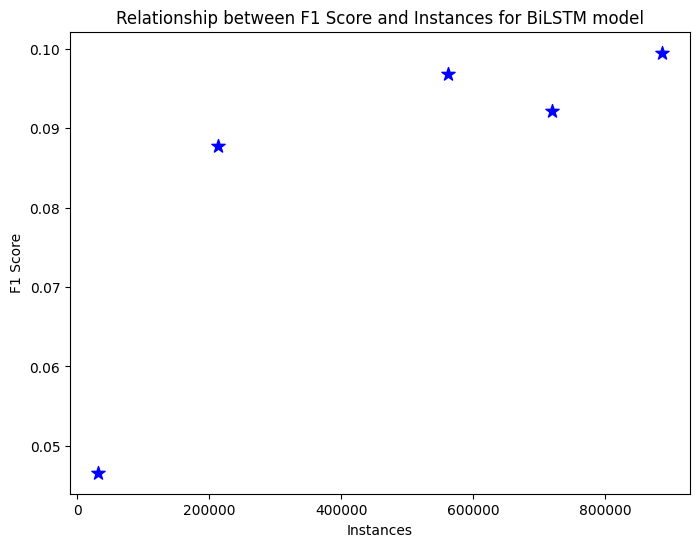

In [ ]:
# Data for recall score and instances
f1score_score_data = [
    df_bilstm_10_projects['f1score'].mean(),
    df_bilstm_50_projects['f1score'].mean(),
    df_bilstm_100_projects['f1score'].mean(),
    df_bilstm_150_projects['f1score'].mean(),
    df_bilstm_500_projects['f1score'].mean()
]

#print(accuracy_score_data)
# Corresponding instance counts, repeated 25 times to match the length of each recall data set
instances = [32054] * 25 + [212971] * 25 + [561321] * 25 + [719366] * 25 + [885995] * 25

# Flatten recall_data list to get all data points in a single list
#recall_scores = [score for dataset in accuracy_data for score in dataset]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(all_instances,f1score_score_data,color='blue', marker='*', s=100)  # s=100 for marker size

# Labels and title
plt.xlabel("Instances")
plt.ylabel("F1 Score")
plt.title("Relationship between F1 Score and Instances for BiLSTM model")

# Save as PDF
plt.savefig("/content/plot_results/f1_score_vs_instances_plot_bilstm_main_upd1.pdf")
plt.show()

Compute ranges such as Max, min, Interquartile range for KenLM

In [ ]:
#10 projects 0.7954091055393219
#50 projects 0.7619405707716942
#100 projects 0.7421573327654593
#150 projects 0.7313720733838404
#500 projects

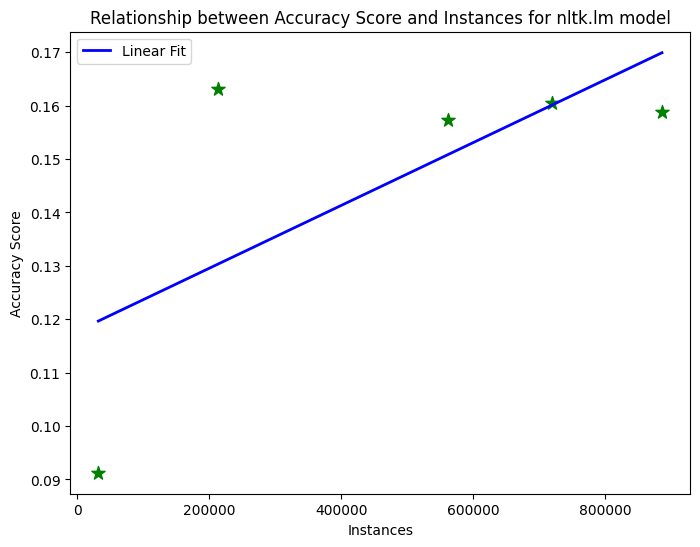

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Data for recall score and instances
accuracy_data = [
    df_nltk_10_projects['accuracy'].mean(),
    df_nltk_50_projects['accuracy'].mean(),
    df_nltk_100_projects['accuracy'].mean(),
    df_nltk_150_projects['accuracy'].mean(),
    df_nltk_500_projects['accuracy'].mean()
]

# Corresponding instance counts
instances = [32054, 212971, 561321, 719366, 885995]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(instances, accuracy_data, color='green', marker='*', s=100)  # Unchanged scatter plot

# Perform linear regression
slope, intercept, _, _, _ = linregress(instances, accuracy_data)

# Generate line values for plotting
line_x = np.linspace(min(instances), max(instances), 100)
line_y = slope * line_x + intercept

# Plot the regression line without affecting the scatter plot
plt.plot(line_x, line_y, color='blue', linestyle='-', linewidth=2, label='Linear Fit')

# Labels, title, and legend
plt.xlabel("Instances")
plt.ylabel("Accuracy Score")
plt.title("Relationship between Accuracy Score and Instances for nltk.lm model")
plt.legend()

# Save as PDF
plt.savefig("/content/plot_results/accuracy_score_vs_instances_plot_nltk_main_upd_corr.pdf")
plt.show()
